<p></p>
<br />
<div id="sec_intro_to_intro" style="direction: ltr; line-height: 300%;">
    <font face="XB Zar" size="4">
        <div style="text-align: center;">
            <font color="crimson" size="6">
                <b>Transportation Planning Project - Phase I</b>
            </font>
        </div>
        <p></p>
        <hr>
        <h4 align="center"><b>Mahdi Mehri</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 99109993</h4>
        <h4 align="center"><b>Kimia Ziaei</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 400103505</h4>
        <h4 align="center"><b>Sobhan Kasaei</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 400103602</h4>
        <p></p>
    </font>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, roc_auc_score, log_loss
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '2021_Green_Taxi_Trip_Data.csv'
df = pd.read_csv(file_path, low_memory=False)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,01/01/2021 12:15:56 AM,01/01/2021 12:19:52 AM,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,01/01/2021 12:25:59 AM,01/01/2021 12:34:44 AM,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,01/01/2021 12:45:57 AM,01/01/2021 12:51:55 AM,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,12/31/2020 11:57:51 PM,01/01/2021 12:04:56 AM,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,01/01/2021 12:16:36 AM,01/01/2021 12:16:40 AM,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=7>
            Section 1
        </font>
	</font>
</div>

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Q1
        </font>
	</font>
</div>

In [3]:
# Removing the unnecessary columns:
columns_to_remove = [
    'RatecodeID',
    'store_and_fwd_flag',
    'improvement_surcharge',
    'ehail_fee',
    'mta_tax',
    'extra',
    'fare_amount',
    'congestion_surcharge'
]

df.drop(columns=columns_to_remove, inplace=True)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type
0,2.0,01/01/2021 12:15:56 AM,01/01/2021 12:19:52 AM,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0
1,2.0,01/01/2021 12:25:59 AM,01/01/2021 12:34:44 AM,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0
2,2.0,01/01/2021 12:45:57 AM,01/01/2021 12:51:55 AM,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0
3,2.0,12/31/2020 11:57:51 PM,01/01/2021 12:04:56 AM,168,75,1.0,1.99,0.00,0.0,9.30,2.0,1.0
4,2.0,01/01/2021 12:16:36 AM,01/01/2021 12:16:40 AM,265,265,3.0,0.00,0.00,0.0,-52.80,3.0,1.0


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Q2
        </font>
	</font>
</div>

In [4]:
# if 'tip_amount' > 0 and 'payment_type' is NaN, set 'payment_type' to 1
df.loc[(df['tip_amount'] > 0) & (df['payment_type'].isna()), 'payment_type'] = 1

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Q3
        </font>
	</font>
</div>

In [5]:
# If the number of passengers is greater than 4, change trip type to dispatch (2) and change payment type to unknown (5)
df.loc[df['passenger_count'] > 4, ['trip_type', 'payment_type']] = [2, 5]

# Check if the modification has been done correctly:
modified_rows = df[df['passenger_count'] > 4]
print((modified_rows['trip_type'] != 2).any(),
      (modified_rows['payment_type'] != 5).any())

False False


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Q4
        </font>
	</font>
</div>

In [6]:
# Drop the observations in which vendorID has null value.
df = df.dropna(subset=['VendorID'])

# Check if the modification has been done correctly:
print(df['VendorID'].unique())

# According to the metadata, VendorID can only have values of 1 or 2, so we should convert 5s to Null.
df['VendorID'] = df['VendorID'].replace(5, np.nan)

# Check if the modification has been done correctly:
print(df['VendorID'].isnull().any())

[2. 1. 5.]
True


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Q5
        </font>
	</font>
</div>

In [7]:
# Convert to datatime format:
df['lpep_pickup_datetime'] = pd.to_datetime(
    df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(
    df['lpep_dropoff_datetime'], errors='coerce')

# Keep the trips in 2021:
df = df[df['lpep_pickup_datetime'].dt.year == 2021]

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Data Validation
        </font>
		<p></p>
		<hr>
         In this section we check whether all of the values are valid, and if not, do the necessary modifications.</br>
         We already did data validation for the variable 'VendorID' in Q5.
        <br />
	</font>
</div>

In [8]:
df.isnull().mean() * 100

VendorID                  0.000488
lpep_pickup_datetime      0.000000
lpep_dropoff_datetime     0.000000
PULocationID              0.000000
DOLocationID              0.000000
passenger_count          19.926428
trip_distance             0.000000
tip_amount                0.000000
tolls_amount              0.000000
total_amount              0.000000
payment_type             16.344603
trip_type                19.926428
dtype: float64

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,819606.0,1.867486,1.0,2.0,2.0,2.0,2.0,0.339049
lpep_pickup_datetime,819610,2021-08-10 06:15:53.961680128,2021-01-01 00:07:20,2021-05-25 14:47:28.249999872,2021-09-02 18:09:43.500000,2021-11-01 18:59:22,2021-12-31 23:59:00,NaN
lpep_dropoff_datetime,819610,2021-08-10 06:40:20.952843520,2021-01-01 00:12:01,2021-05-25 15:09:35.750000128,2021-09-02 18:43:00,2021-11-01 19:25:37.750000128,2022-01-01 21:05:53,NaN
PULocationID,819610.0,104.701609,1.0,60.0,75.0,152.0,265.0,67.964888
DOLocationID,819610.0,134.14354,1.0,72.0,134.0,205.0,265.0,77.076549
passenger_count,656291.0,1.271882,0.0,1.0,1.0,1.0,48.0,0.898934
trip_distance,819610.0,124.132784,0.0,1.23,2.3,5.02,334303.19,3866.589372
tip_amount,819610.0,1.310848,-86.0,0.0,0.0,2.06,400.0,2.665392
tolls_amount,819610.0,0.493035,0.0,0.0,0.0,0.0,65.55,1.818438
total_amount,819610.0,21.832688,-300.8,10.3,16.51,27.0,2113.55,18.024401


In [10]:
# Checking the values of passenger_count
print("Values of passenger_count:", df['passenger_count'].unique())

Values of passenger_count: [ 1.  3.  6.  2.  5.  0.  4.  8.  7.  9. 48. 32. nan]


In [11]:
# Count the number of observations where passenger_count > 16 and print the result
print("Number of trips with a passenger_count greater than 16:",
      len(df[df['passenger_count'] > 16]))

# Count the number of observations where passenger_count = 0 and print the result
print("Number of trips with a passenger_count equal to 0:",
      len(df[df['passenger_count'] == 0]))

Number of trips with a passenger_count greater than 16: 2
Number of trips with a passenger_count equal to 0: 1431


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                Even large vans can accommodate up to around 16 passengers, making passenger counts of 32 and 48 unrealistic. Since there are only two observations with these values, they are likely typos and should be considered invalid. Therefore, we will replace these values with null to maintain data integrity.</br>Also number of passengers equal to 0 is not sensible and we regard them as invalid data and replace them with null values. 
        </font>
</div>

In [12]:
# Replace invalid passenger_count data (greater than 16 and equal to 0) with NaN
df.loc[(df['passenger_count'] > 16), 'passenger_count'] = np.nan
df.loc[(df['passenger_count'] == 0), 'passenger_count'] = np.nan

In [13]:
# Count the number of observations where trip_distance > 36 and print the result
print("Number of trips with a distance greater than 36 miles:",
      len(df[df['trip_distance'] > 36]))

Number of trips with a distance greater than 36 miles: 1734


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                The maximum possible trip distance in New York is 36 miles, and a trip distance of 0 is not realistic. Therefore, we will replace these invalid values with null values. 
        </font>
</div>

In [14]:
# Replace invalid trip distances (greater than 36 or equal to 0) with NaN
df.loc[(df['trip_distance'] > 36) | (
    df['trip_distance'] == 0), 'trip_distance'] = np.nan

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                Obviously, tip amount and total amount can't be negative, so we will change the negative values to Null.
        </font>
</div>

In [15]:
# Change negative values in 'tip_amount' to NaN
df.loc[df['tip_amount'] < 0, 'tip_amount'] = np.nan
# Change negative values in 'total_amount' to NaN
df.loc[df['total_amount'] < 0, 'total_amount'] = np.nan

In [16]:
# Due to https://www.nyc.gov/site/tlc/about/fatigued-driving-prevention-frequently-asked-questions.page
# we assume that the maximum time a driver can drive is 10 hours.
df['trip_time_in_minutes'] = (df['lpep_dropoff_datetime'] -
                              df['lpep_pickup_datetime']) / np.timedelta64(1, 'm')
df['trip_time_in_hours'] = df['trip_time_in_minutes'] / 60
df = df[(df["trip_time_in_hours"] <= 10) &
        (df["trip_time_in_minutes"] > 1) & (df["trip_distance"] > 0)]

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,769808.0,1.884308,1.0,2.0,2.0,2.0,2.0,0.319856
lpep_pickup_datetime,769812,2021-08-11 02:44:17.945837568,2021-01-01 00:07:20,2021-05-27 00:29:12.249999872,2021-09-03 22:02:06,2021-11-02 11:37:25.249999872,2021-12-31 23:59:00,NaN
lpep_dropoff_datetime,769812,2021-08-11 03:03:39.519308800,2021-01-01 00:12:01,2021-05-27 00:43:35.249999872,2021-09-03 22:22:25.500000,2021-11-02 11:59:00.249999872,2022-01-01 00:38:20,NaN
PULocationID,769812.0,103.37906,1.0,56.0,75.0,147.0,265.0,67.232492
DOLocationID,769812.0,133.722515,1.0,71.0,133.0,205.0,265.0,76.839352
passenger_count,609583.0,1.284375,1.0,1.0,1.0,1.0,9.0,0.911627
trip_distance,769812.0,4.3699,0.01,1.37,2.47,5.27,36.0,4.973538
tip_amount,769806.0,1.3386,0.0,0.0,0.0,2.15,400.0,2.505966
tolls_amount,769812.0,0.493345,0.0,0.0,0.0,0.0,65.55,1.812252
total_amount,768943.0,21.919161,0.0,10.3,16.55,27.04,867.8,16.996622


In [18]:
df.isnull().mean() * 100

VendorID                  0.000520
lpep_pickup_datetime      0.000000
lpep_dropoff_datetime     0.000000
PULocationID              0.000000
DOLocationID              0.000000
passenger_count          20.814043
trip_distance             0.000000
tip_amount                0.000779
tolls_amount              0.000000
total_amount              0.112885
payment_type             16.961674
trip_type                20.671281
trip_time_in_minutes      0.000000
trip_time_in_hours        0.000000
dtype: float64

<div id="sec_intro_to_intro" style="direction:ltr; line-height:1.8;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Handling Null Values
        </font>
        <p></p>
        <hr>
        <ul>
            <li><b>VendorID:</b> 0.0005%</li>
            <li><b>Passenger Count:</b> 20.81%</li>
            <li><b>Tip Amount:</b> 0.00078%</li>
            <li><b>Total Amount:</b> 0.11%</li>
            <li><b>Payment Type:</b> 16.96%</li>
            <li><b>Trip Type:</b> 20.67%</li>
        </ul>
    </ul>

<p>As null values of <i>VendorID</i>, <i>Tip Amount</i>, and <i>Total Amount</i> are below 5%, we should replace them with their mode or mean/median.</p>

<ul>
    <li><i>VendorID</i> is a categorical variable, so we will replace its null values with its mode.</li>
    <li><i>Tip Amount</i> and <i>Total Amount</i> are continuous variables, so we will replace their null values with their mean or median.</li>
</ul>
    </font>
</div>


In [19]:
# Calculate the mode of 'VendorID'
vendor_mode = df['VendorID'].mode()[0]

# Replace NaN values in 'VendorID' with its mode
df['VendorID'].fillna(vendor_mode, inplace=True)

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                We will now plot the distribution of the tip amount to determine whether the median or mean is more appropriate for replacing the null values. 
        </font>
</div>

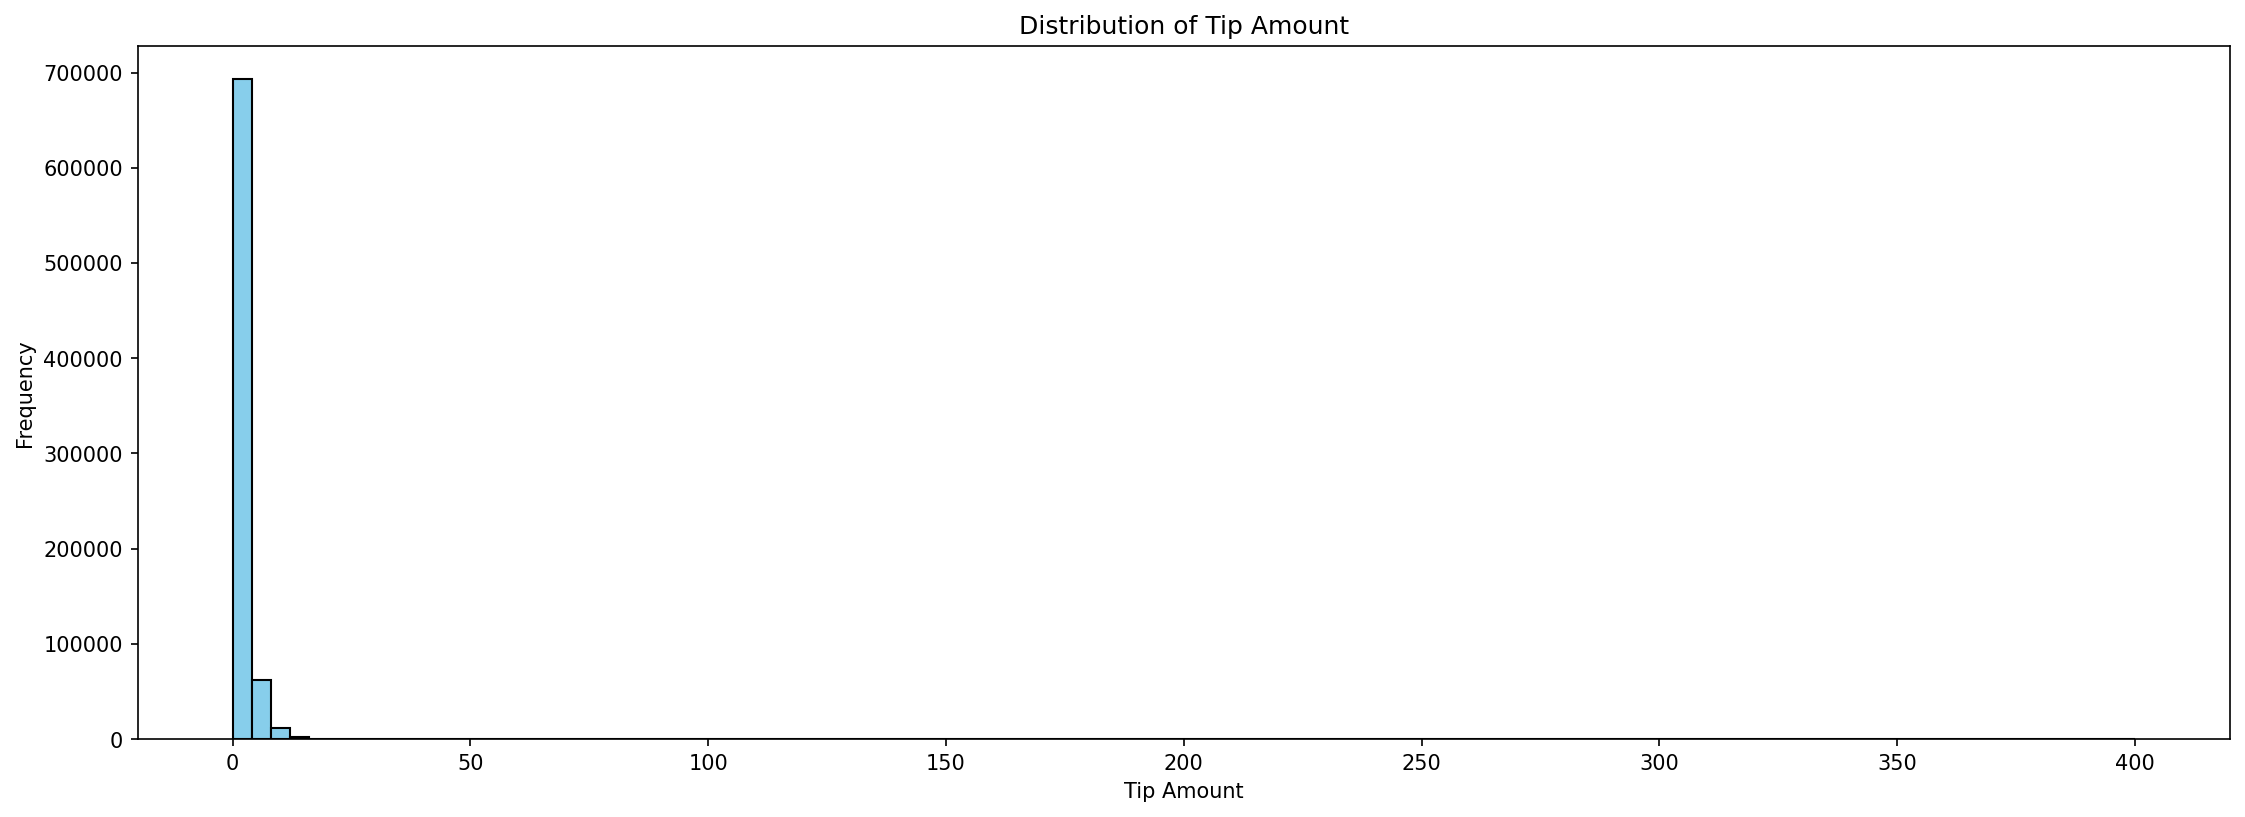

Mean of Tip Amount: 1.34
Median of Tip Amount: 0.00


In [20]:
plt.figure(figsize=(18, 6), dpi=150)

df['tip_amount'].plot(
    kind='hist',
    bins=100,
    color='skyblue',
    edgecolor='black',
    title="Distribution of Tip Amount"
)

plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.show()

print(f"Mean of Tip Amount: {df['tip_amount'].mean():.2f}")
print(f"Median of Tip Amount: {df['tip_amount'].median():.2f}")

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                The data is skewed and exhibits a long tail, making the median a more suitable choice for filling the null values in the tip amount.
        </font>
</div>

In [21]:
# Calculate the median of tip_amount
tip_mean = df['tip_amount'].median()

# Replace NaN values in tip_amount with its median
df['tip_amount'].fillna(tip_mean, inplace=True)

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                We will now plot the distribution of the total amount to determine whether the median or mean is more appropriate for replacing the null values.
        </font>
</div>

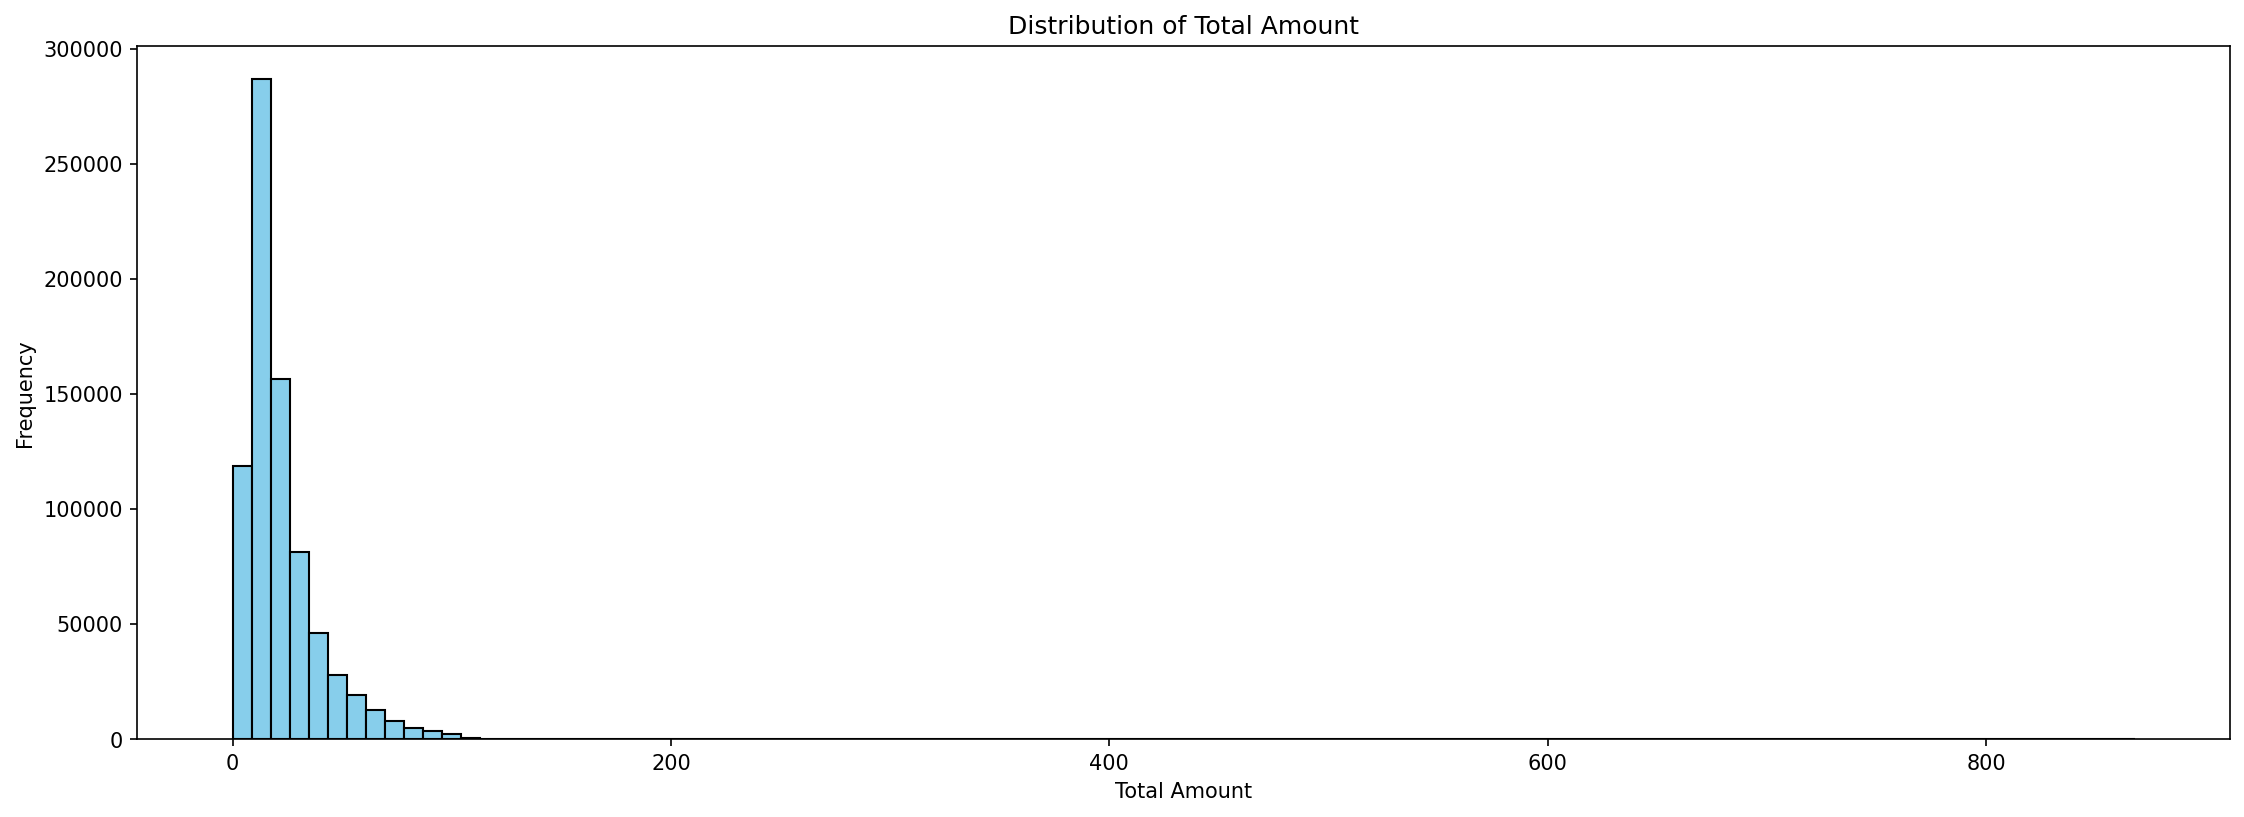

Mean of Total Amount: 21.92
Median of Total Amount: 16.55


In [22]:
plt.figure(figsize=(18, 6), dpi=150)
df['total_amount'].plot(
    kind='hist',
    bins=100,
    color='skyblue',
    edgecolor='black',
    title="Distribution of Total Amount"
)

plt.xlabel("Total Amount")
plt.ylabel("Frequency")

plt.show()

print(f"Mean of Total Amount: {df['total_amount'].mean():.2f}")
print(f"Median of Total Amount: {df['total_amount'].median():.2f}")

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                For the total amount, the data is also skewed with a very long tail. Large values can significantly distort the mean, making the median a more reliable choice for filling null values.
        </font>
</div>

In [23]:
# Calculate the mean of total_amount
total_amount_median = df['total_amount'].median()

# Replace NaN values in total_amount with its mean
df['total_amount'].fillna(total_amount_median, inplace=True)

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=6>
            Feature Engineering
        </font>
	</font>
</div>

In [24]:
df['speed'] = df['trip_distance'] / df['trip_time_in_minutes']

In [25]:
# Deriving hour, weekday, month and month day based on pickup_datetime
df['hour'] = df['lpep_pickup_datetime'].dt.hour

df['weekday'] = df['lpep_pickup_datetime'].dt.weekday

df['monthday'] = df['lpep_pickup_datetime'].dt.day

df['month'] = df['lpep_pickup_datetime'].dt.month

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,trip_time_in_minutes,trip_time_in_hours,speed,hour,weekday,monthday,month
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,3.933333,0.065556,0.256780,0,4,1,1
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,8.750000,0.145833,0.289143,0,4,1,1
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,5.966667,0.099444,0.187709,0,4,1,1
7,2.0,2021-01-01 00:26:31,2021-01-01 00:28:50,75,75,6.0,0.45,0.96,0.0,5.76,5.0,2.0,2.316667,0.038611,0.194245,0,4,1,1
9,2.0,2021-01-01 00:58:32,2021-01-01 01:32:34,225,265,1.0,12.19,2.75,0.0,42.05,1.0,1.0,34.033333,0.567222,0.358178,0,4,1,1


In [26]:
# Add a new column to df to see if the date is a holiday or not
holidays = pd.read_csv('Holidays.csv')

holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')
df['is_holiday'] = df['lpep_pickup_datetime'].dt.date.isin(
    holidays['date'].dt.date)

df.drop(columns=["trip_time_in_hours"], inplace=True)
df_dropped = df.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df_dropped.head()

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,trip_time_in_minutes,speed,hour,weekday,monthday,month,is_holiday
0,2.0,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,3.933333,0.256780,0,4,1,1,True
1,2.0,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,8.750000,0.289143,0,4,1,1,True
2,2.0,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,5.966667,0.187709,0,4,1,1,True
7,2.0,75,75,6.0,0.45,0.96,0.0,5.76,5.0,2.0,2.316667,0.194245,0,4,1,1,True
9,2.0,225,265,1.0,12.19,2.75,0.0,42.05,1.0,1.0,34.033333,0.358178,0,4,1,1,True


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Building Predictive Models to Handle Null Values
        </font>
        <p></p>
        <hr />
        For <i>passenger_count</i>, <i>payment_type</i>, and <i>trip_type</i>, we should build a model to predict the null values and fill them with the predicted values.
        <br />
    </font>
</div>


In [27]:
def plot(data, column_name):
    _, ax = plt.subplots(figsize=(18, 6), dpi=150)
    sns.countplot(x=column_name, data=data, ax=ax,
                  hue=column_name, legend=False)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    plt.show()

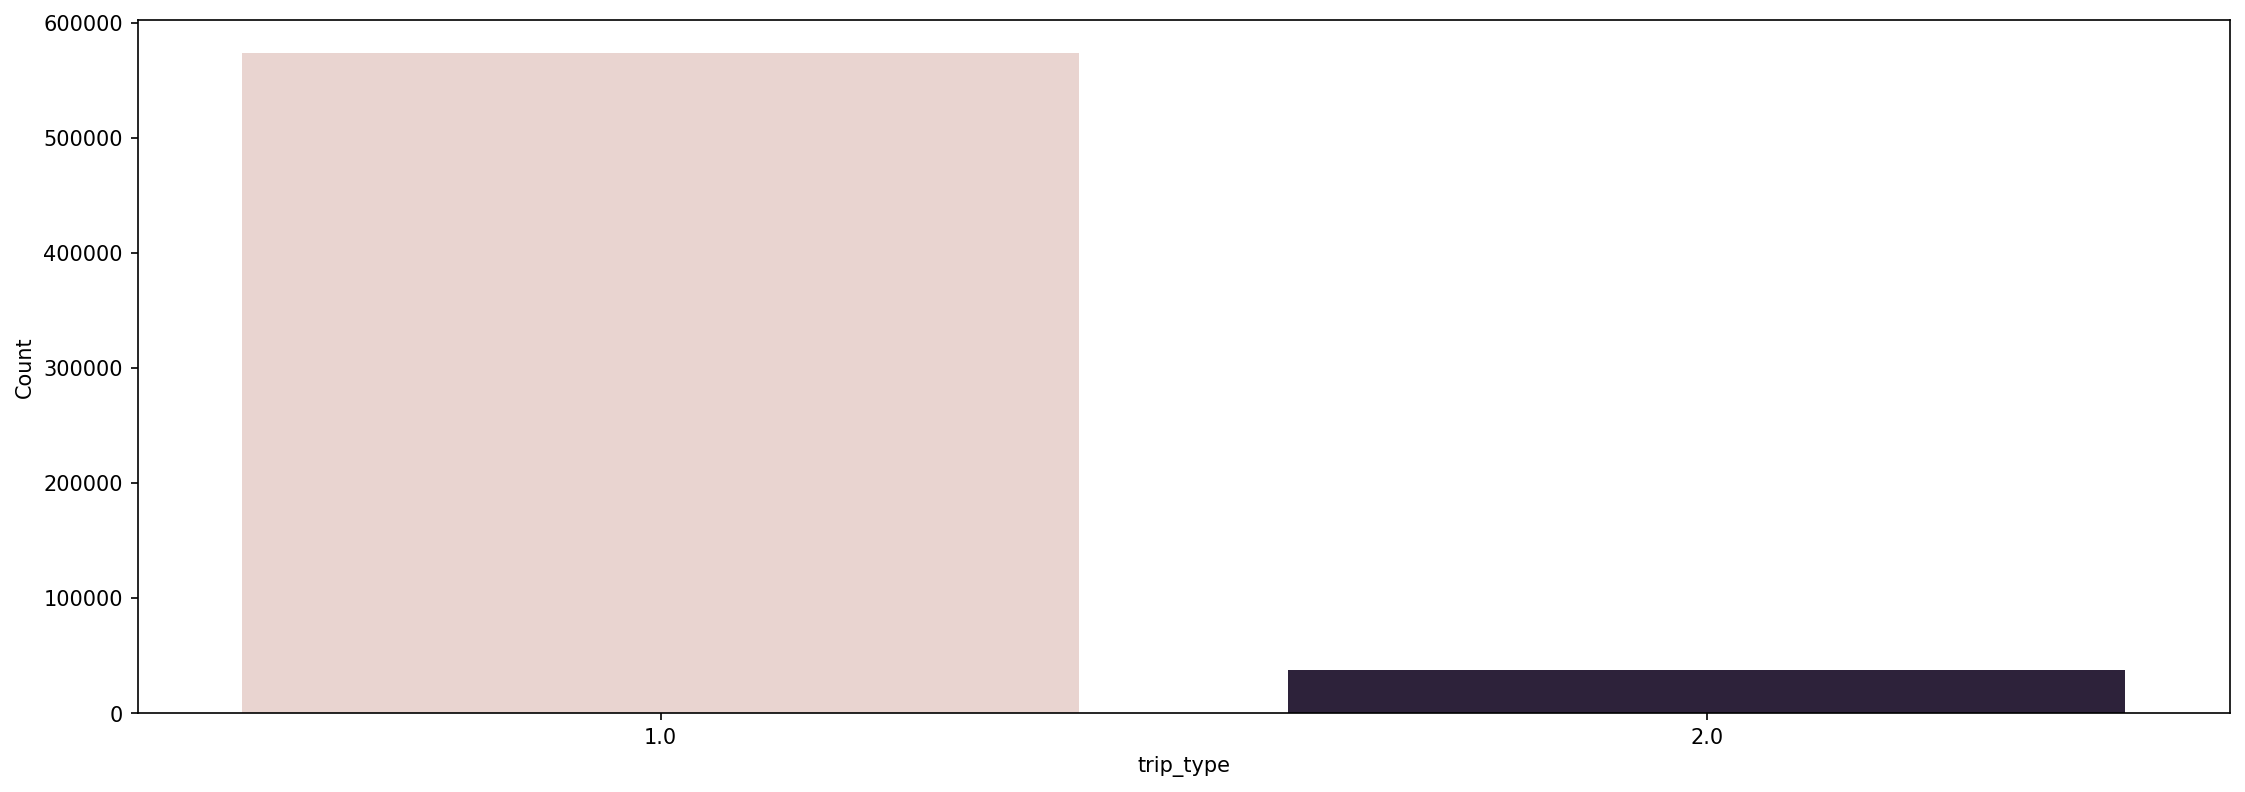

In [28]:
# To check if the target column is balanced or not.
plot(df_dropped, "trip_type")

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
    <hr />
        Due to the imbalance in our target column, we can either use <i>Oversampling</i> or <i>Undersampling</i> method to balance the data. In this case, we use the <i>Undersampling</i> method.
    </font>
</div>


In [29]:
# We dont use trip_type, passenger_count, payment_type beacuse of the null values
# Also we dont use tip_amount and total_amount because we should predict them in the nex tasks using trip_type
columns_to_drop = ['trip_type', 'passenger_count',
                   'tip_amount', 'total_amount', 'payment_type']

# Separate the classes into minority and majority classes
majority_class = df_dropped[df_dropped['trip_type'] == 1]  # Majority class (1)
minority_class = df_dropped[df_dropped['trip_type'] == 2]  # Minority class (2)
test_data = df_dropped[df_dropped['trip_type'].isnull()]

# Undersample majority class to match the number of minority class samples
majority_class_undersampled = majority_class.sample(
    len(minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
df_balanced = pd.concat([majority_class_undersampled, minority_class])
df_balanced['trip_type'] = df_balanced['trip_type'].map({1: 0, 2: 1})
X_balanced = df_balanced.drop(columns=columns_to_drop)
y_balanced = df_balanced['trip_type']

# Train-test split for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, shuffle=True)

# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss', n_estimators=200, colsample_bytree=0.8)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.15],
    'subsample': [0.6, 8.0, 1.0],
}

# Set up GridSearchCV with 3-fold cross-validation, using accuracy score as the evaluation metric
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy score as the evaluation metric
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1
)

# Fit the GridSearchCV on training data
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters and best model from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
best_model.fit(X_train_split, y_train_split)
# Validate the model with the best found parameters using accuracy score
val_predictions = best_model.predict(X_val_split)
val_f1_score = accuracy_score(y_val_split, val_predictions)
print(f"Validation F1 Score: {val_f1_score:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'subsample': 1.0}
Validation F1 Score: 0.6912


<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        We do the same to other columns that require imputation using a model.
    </font>
</div>

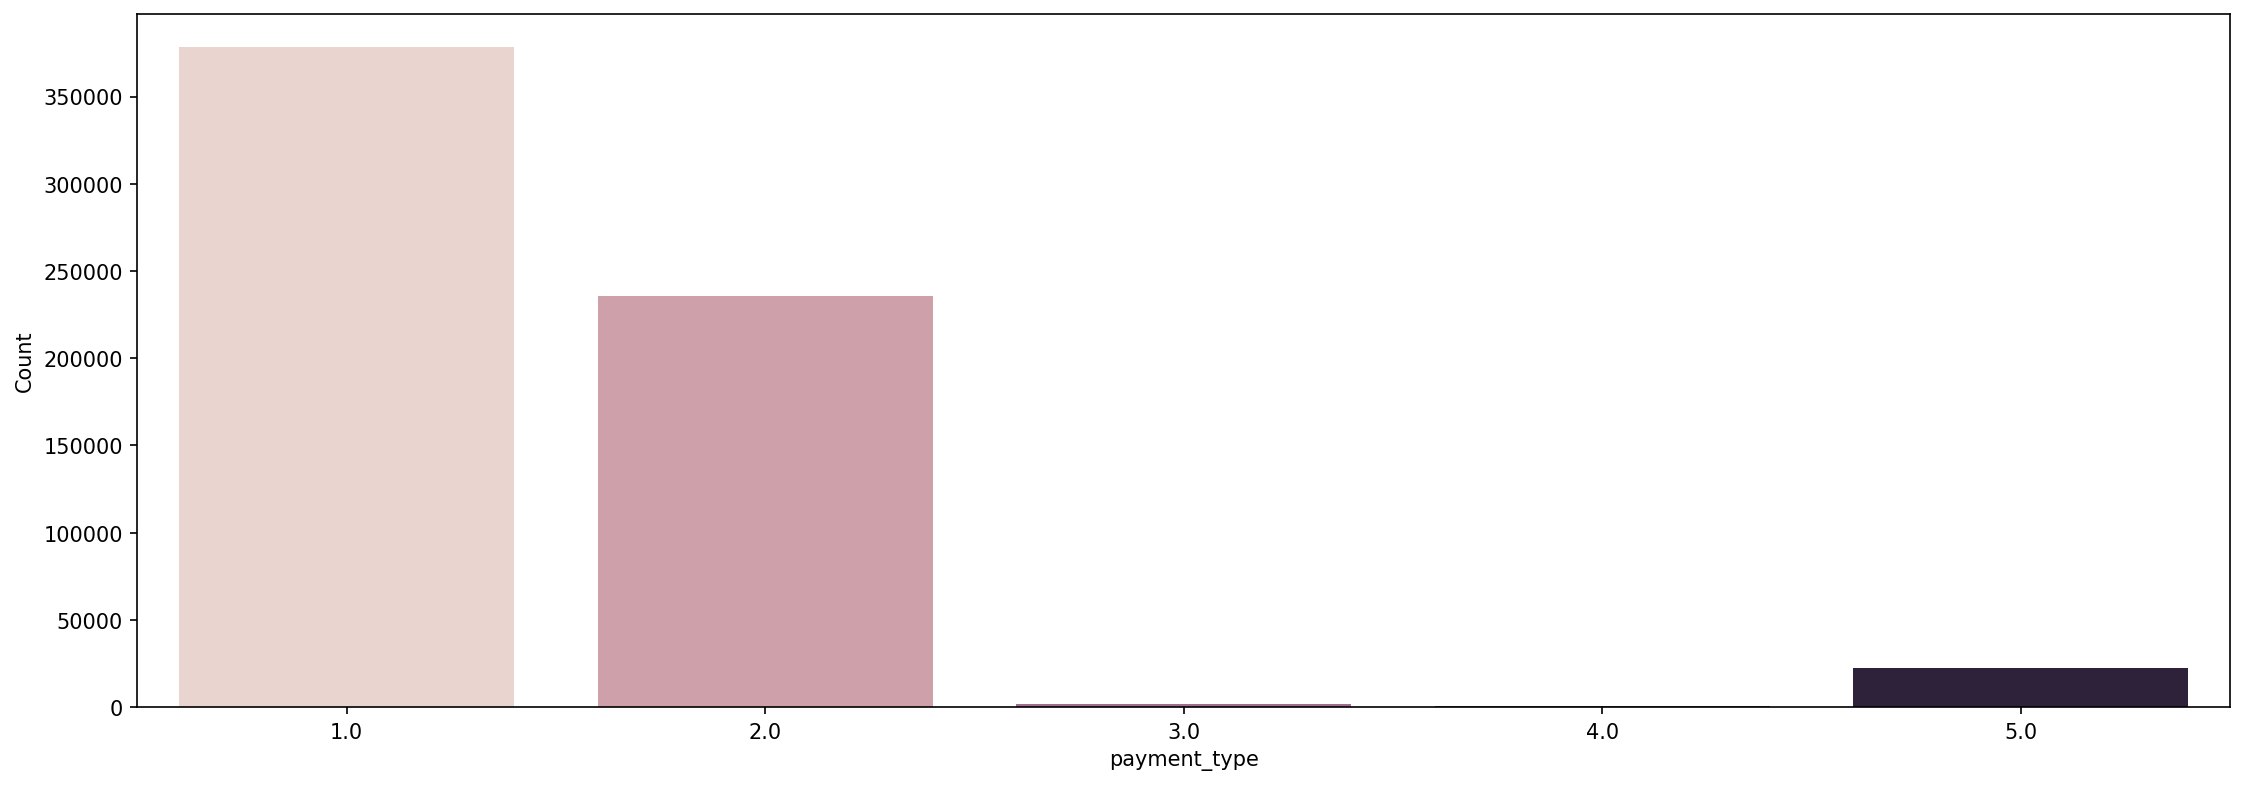

In [30]:
plot(df_dropped, "payment_type")

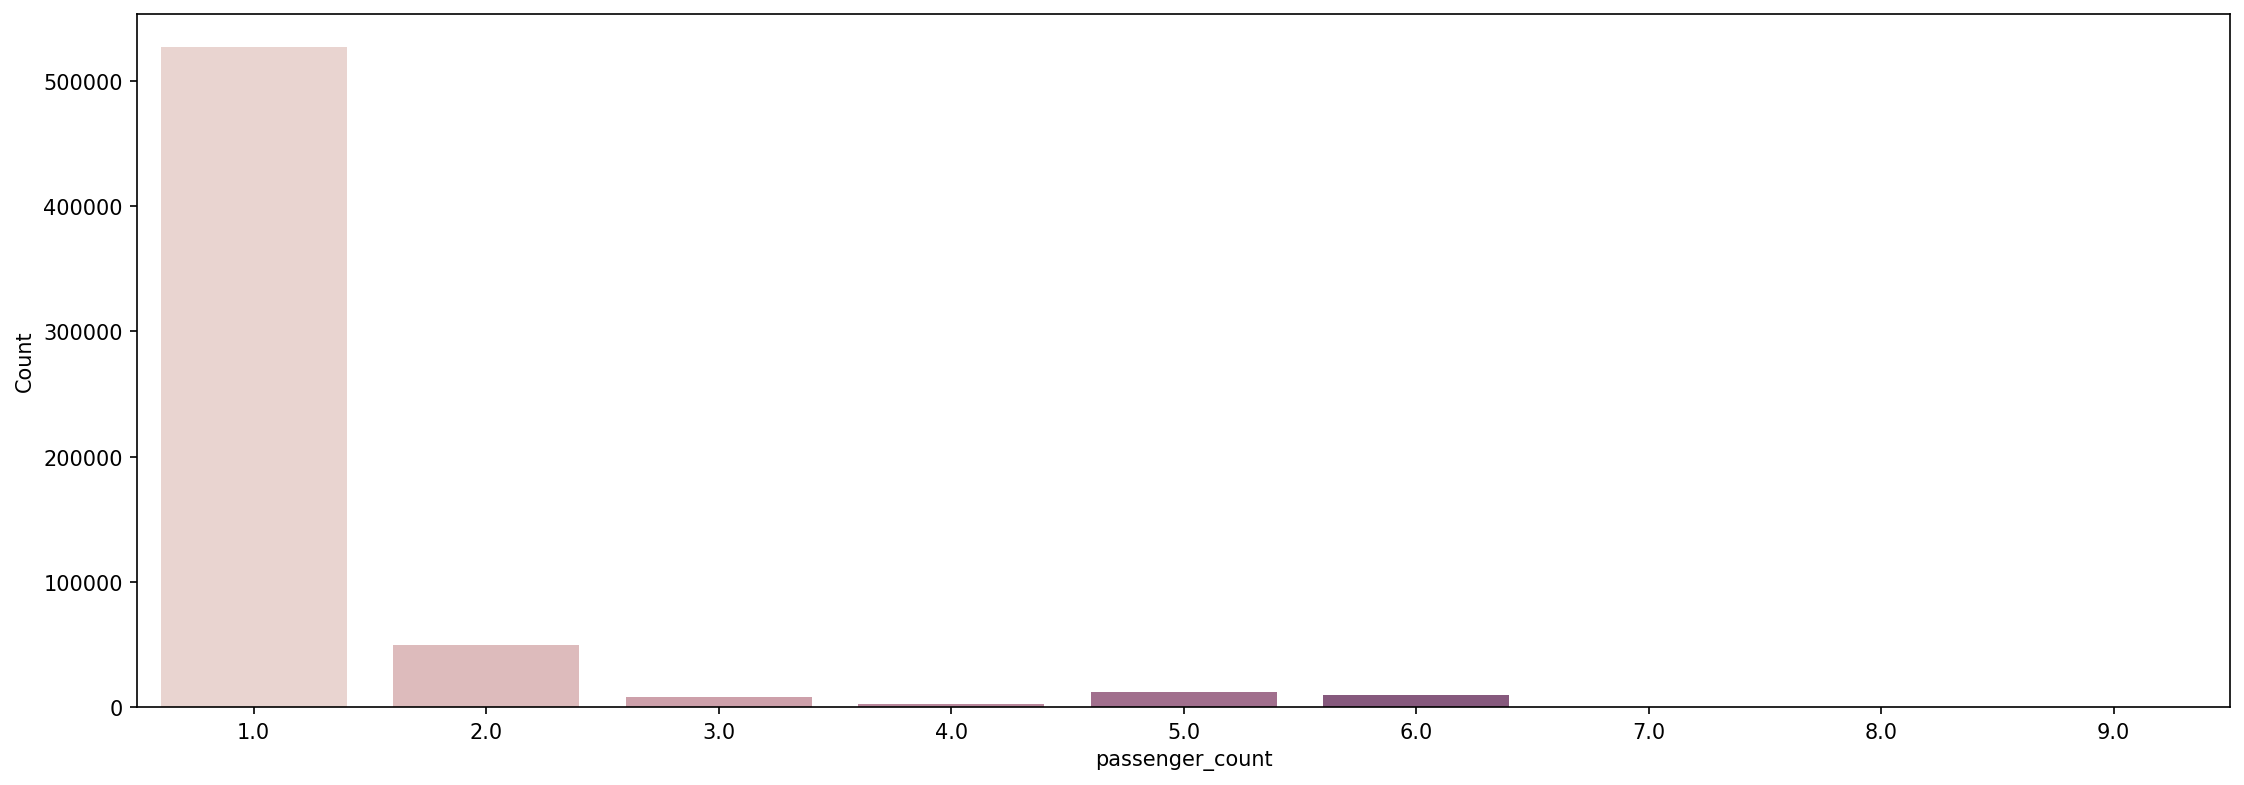

In [31]:
plot(df_dropped, "passenger_count")

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        The results indicate that we have multi-class classification task for other columns. Also the accuracy of the imputation model for <i>trip_type</i> column suggests that the imputation for other columns with high class imbalance and limited data for certain classes, cannot be done accurately using the model at hand. So we drop the remaining null rows.
    </font>
</div>

In [32]:
df_dropped.isnull().mean() * 100

VendorID                 0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count         20.814043
trip_distance            0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
payment_type            16.961674
trip_type               20.671281
trip_time_in_minutes     0.000000
speed                    0.000000
hour                     0.000000
weekday                  0.000000
monthday                 0.000000
month                    0.000000
is_holiday               0.000000
dtype: float64

In [33]:
df_dropped.dropna(inplace=True)
df_dropped.isnull().mean() * 100

VendorID                0.0
PULocationID            0.0
DOLocationID            0.0
passenger_count         0.0
trip_distance           0.0
tip_amount              0.0
tolls_amount            0.0
total_amount            0.0
payment_type            0.0
trip_type               0.0
trip_time_in_minutes    0.0
speed                   0.0
hour                    0.0
weekday                 0.0
monthday                0.0
month                   0.0
is_holiday              0.0
dtype: float64

In [34]:
# payment_type is a categorical variable without any order so we should apply one-hot encoding to this column.
df_dropped = pd.get_dummies(df_dropped, columns=['payment_type'],
                            prefix='payment_type', drop_first=True)
df_dropped.head()

,VendorID,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,trip_type,trip_time_in_minutes,speed,hour,weekday,monthday,month,is_holiday,payment_type_2.0,payment_type_3.0,payment_type_4.0,payment_type_5.0
0,2.0,43,151,1.0,1.01,0.00,0.0,6.80,1.0,3.933333,0.256780,0,4,1,1,True,True,False,False,False
1,2.0,166,239,1.0,2.53,2.81,0.0,16.86,1.0,8.750000,0.289143,0,4,1,1,True,False,False,False,False
2,2.0,41,42,1.0,1.12,1.00,0.0,8.30,1.0,5.966667,0.187709,0,4,1,1,True,False,False,False,False
7,2.0,75,75,6.0,0.45,0.96,0.0,5.76,2.0,2.316667,0.194245,0,4,1,1,True,False,False,False,True
9,2.0,225,265,1.0,12.19,2.75,0.0,42.05,1.0,34.033333,0.358178,0,4,1,1,True,False,False,False,False


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=7>
            Section 2
        </font>
	</font>
</div>

In [35]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,payment_type,trip_type,trip_time_in_minutes,speed,hour,weekday,monthday,month,is_holiday
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,2.0,1.0,3.933333,0.256780,0,4,1,1,True
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,1.0,1.0,8.750000,0.289143,0,4,1,1,True
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,1.0,1.0,5.966667,0.187709,0,4,1,1,True
7,2.0,2021-01-01 00:26:31,2021-01-01 00:28:50,75,75,6.0,0.45,0.96,0.0,5.76,5.0,2.0,2.316667,0.194245,0,4,1,1,True
9,2.0,2021-01-01 00:58:32,2021-01-01 01:32:34,225,265,1.0,12.19,2.75,0.0,42.05,1.0,1.0,34.033333,0.358178,0,4,1,1,True


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Pre-processing for data visualization
        </font>
    </font>
</div>


In [36]:
# Derive the date based on pickup_datetime
df['date'] = df['lpep_pickup_datetime'].dt.date

# mapp the numerical values to their labels for VendorID
vendorid_mapping = {
    1: "LLC",
    2: "VeriFone"
}
df['VendorID'] = df['VendorID'].map(vendorid_mapping)

# mapp the numerical values to their labels for payment_type
payment_type_mapping = {
    0: "flex flare trip",
    1: "credit card",
    2: "cash",
    3: "no charge",
    4: "dispute",
    5: "unknown",
    6: "voided trip"
}

df['payment_type'] = df['payment_type'].map(payment_type_mapping)

# mapp the numerical values to their labels for trip_type
trip_type_mapping = {
    1: "street-hail",
    2: "dispatch"
}

df['trip_type'] = df['trip_type'].map(trip_type_mapping)

# mapp the numerical values to their labels for weekday
weekday_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

df['weekday'] = df['weekday'].map(weekday_mapping)

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Q1
        </font>
        <p></p>
        <hr />
        In this section, we aim to visualize a heatmap displaying the relationship between weekdays and hours of the day to identify trends in the number of trips. This heatmap allows us to pinpoint peak hours and analyze how trip counts vary across different days of the week and times of the day.
        <br />
    </font>
</div>


In [37]:
# Group data to calculate the number of trips for each hour and weekday
heatmap_data = df.groupby(['weekday', 'hour']).size().unstack()

# Reorder weekdays
ordered_days = ['Sunday', 'Saturday', 'Friday',
                'Thursday', 'Wednesday', 'Tuesday', 'Monday']
heatmap_data = heatmap_data.reindex(ordered_days)

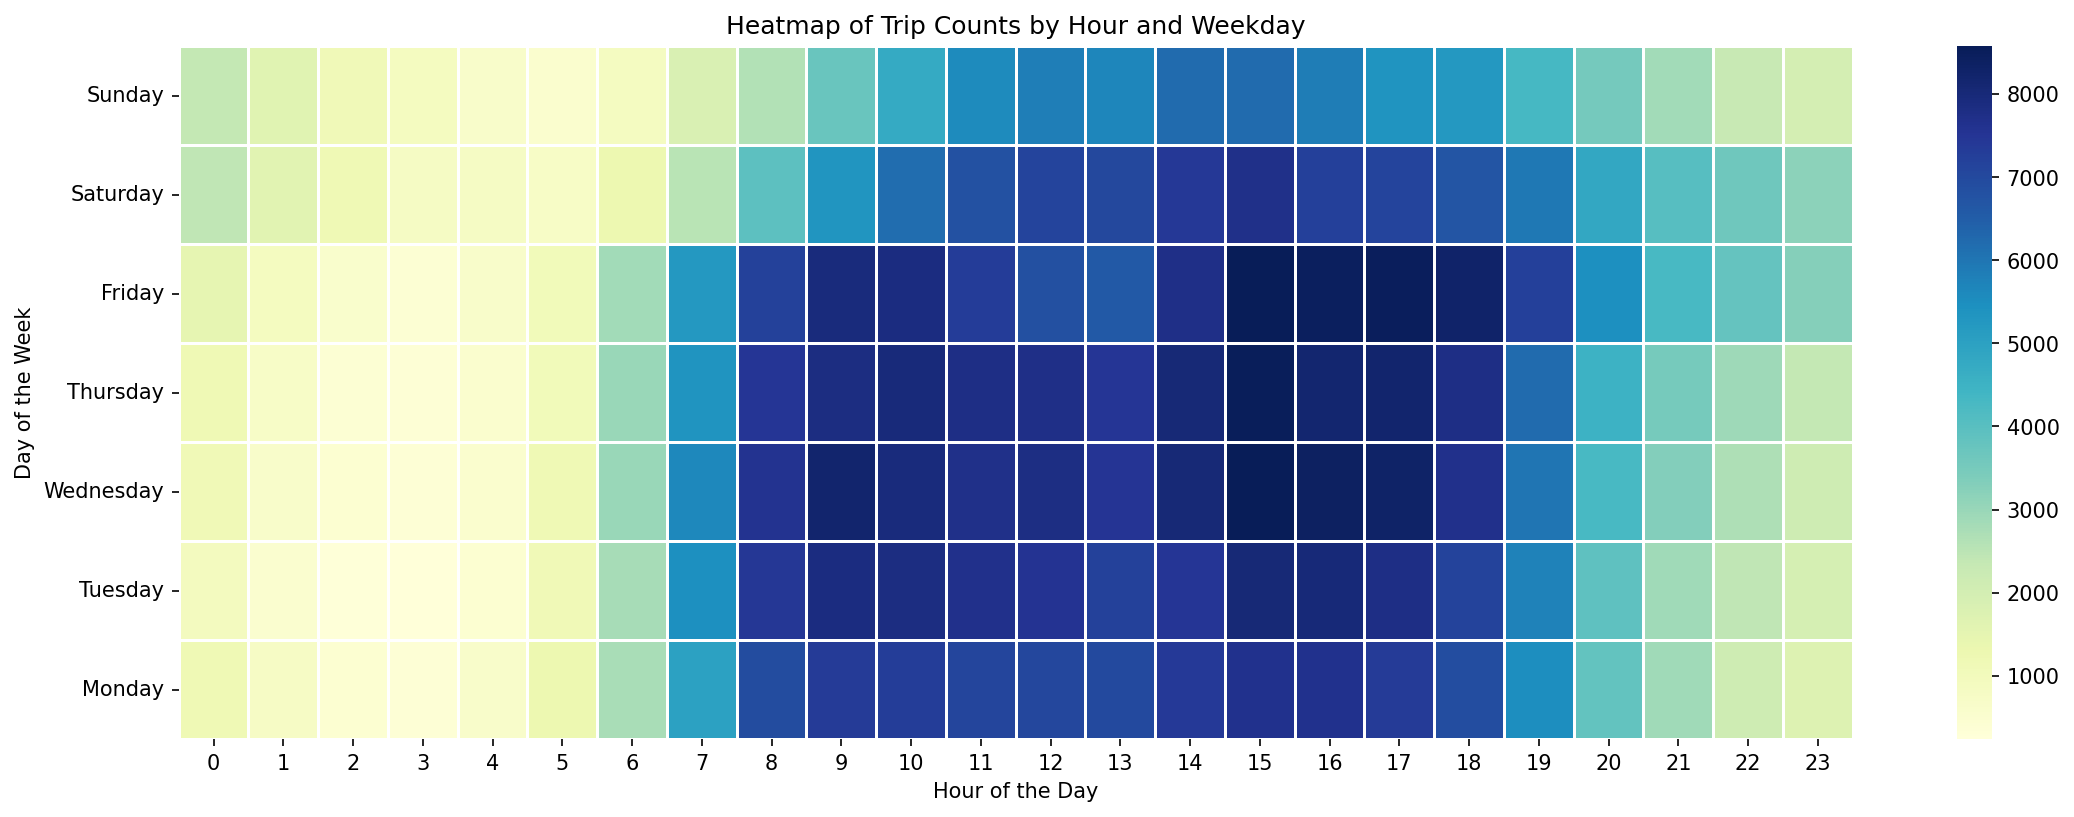

In [38]:
# Plot the heatmap
plt.figure(figsize=(18, 6), dpi=150)
sns.heatmap(heatmap_data, cmap="YlGnBu",
            annot=False, cbar=True, linewidths=0.5)
plt.title("Heatmap of Trip Counts by Hour and Weekday")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <br />
        <p>We can observe from the heatmap that:</p>
        <ul>
            <li> Most trips happen on weekdays, especially from 7 AM to 7 PM, likely because of people traveling to and from work. </li>
            <li> On weekends, there are fewer trips overall, especially during early morning hours. </li>
            <li> We can observe that the peak in trips starts around 9 to 10 AM, which may be attributed to people heading out for recreational activities on weekends. Unlike weekdays, they don't need to wake up early for these activities, leading to a later peak in travel. </li>
            <li> Late at night, trips are very low on all days. This pattern shows how daily routines like work hours affect the number of trips. </li>
            <li> We can observe that on days when the following day is not a workday, such as Friday and Saturday, the number of trips late at night is relatively higher compared to other days. This is likely because people don't need to sleep early or wake up early the next day. Additionally, since New York is a 24-hour city with many places open during the night, people often go out for recreation on Friday and Saturday nights, keeping the number of trips high until midnight. </li>
        </ul>
    </font>
</div>


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Q2
        </font>
        <p></p>
        <hr />
        In this section, we plot a time series graph to analyze how the total amount of money paid by passengers changes over time. This visualization helps identify trends and patterns in payment behavior throughout the year.
        <br />
    </font>
</div>


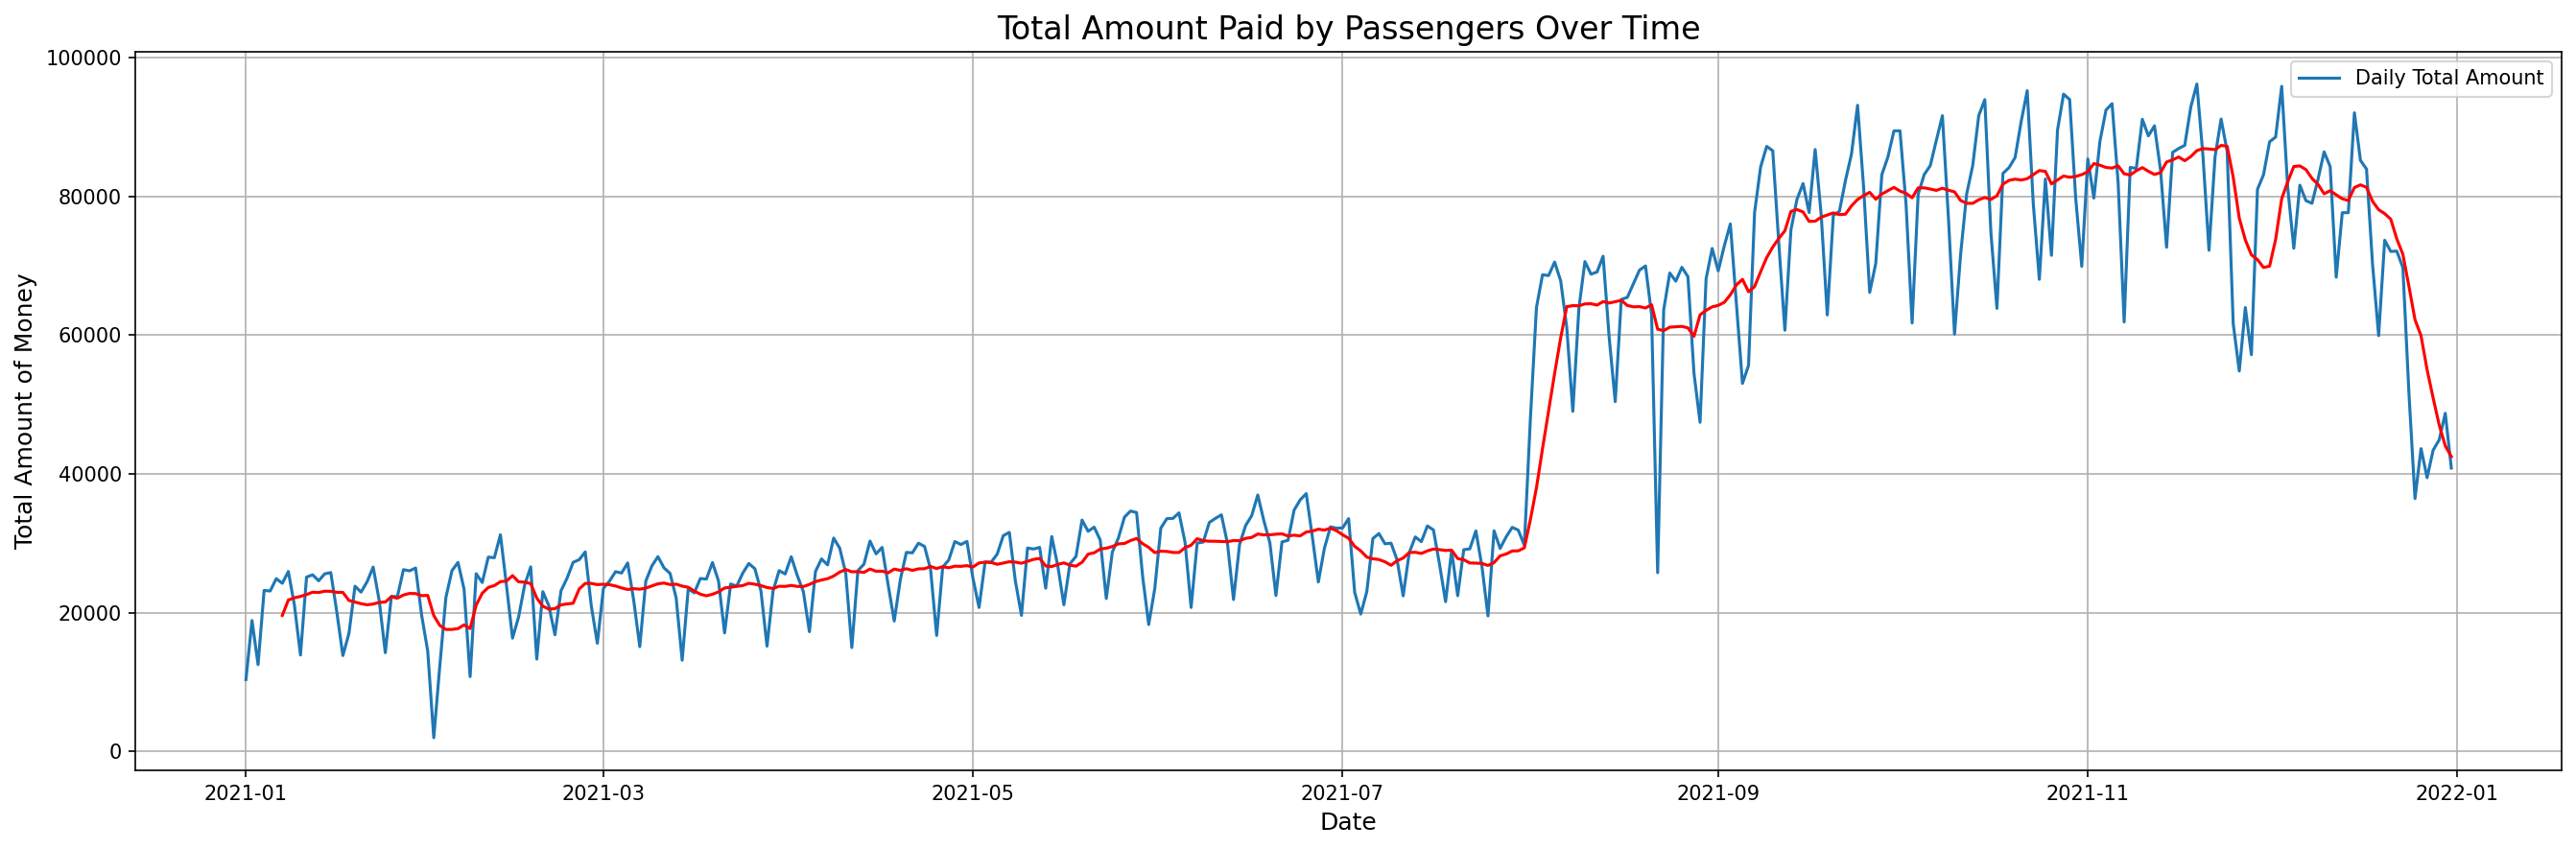

In [39]:
# Aggregate total_amount by day
daily_total = df.groupby(df['lpep_pickup_datetime'].dt.date)[
    'total_amount'].sum()

# Plot the time series graph
plt.figure(figsize=(18, 6), dpi=150)
plt.plot(daily_total.index, daily_total.values,
         linestyle='-', label='Daily Total Amount')
plt.title("Total Amount Paid by Passengers Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Amount of Money", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
daily_total_rolling = daily_total.rolling(window=7).mean()
plt.plot(daily_total.index, daily_total_rolling, color='red',
         linestyle='-', label='7-Day Moving Average')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
               The time series graph shows significant noise, which can likely be attributed to variations in the number of trips between weekends and weekdays. To better understand the overall trend and minimize these fluctuations, we use a moving average approach. The moving average trend line represents the average total amount of money paid by passengers over the previous seven days, including the current day. By smoothing the data in this way, we can observe the general trend more clearly. For this reason, we will include the moving average in the subsequent graphs to enhance the interpretation of the data.
        </font>
</div>

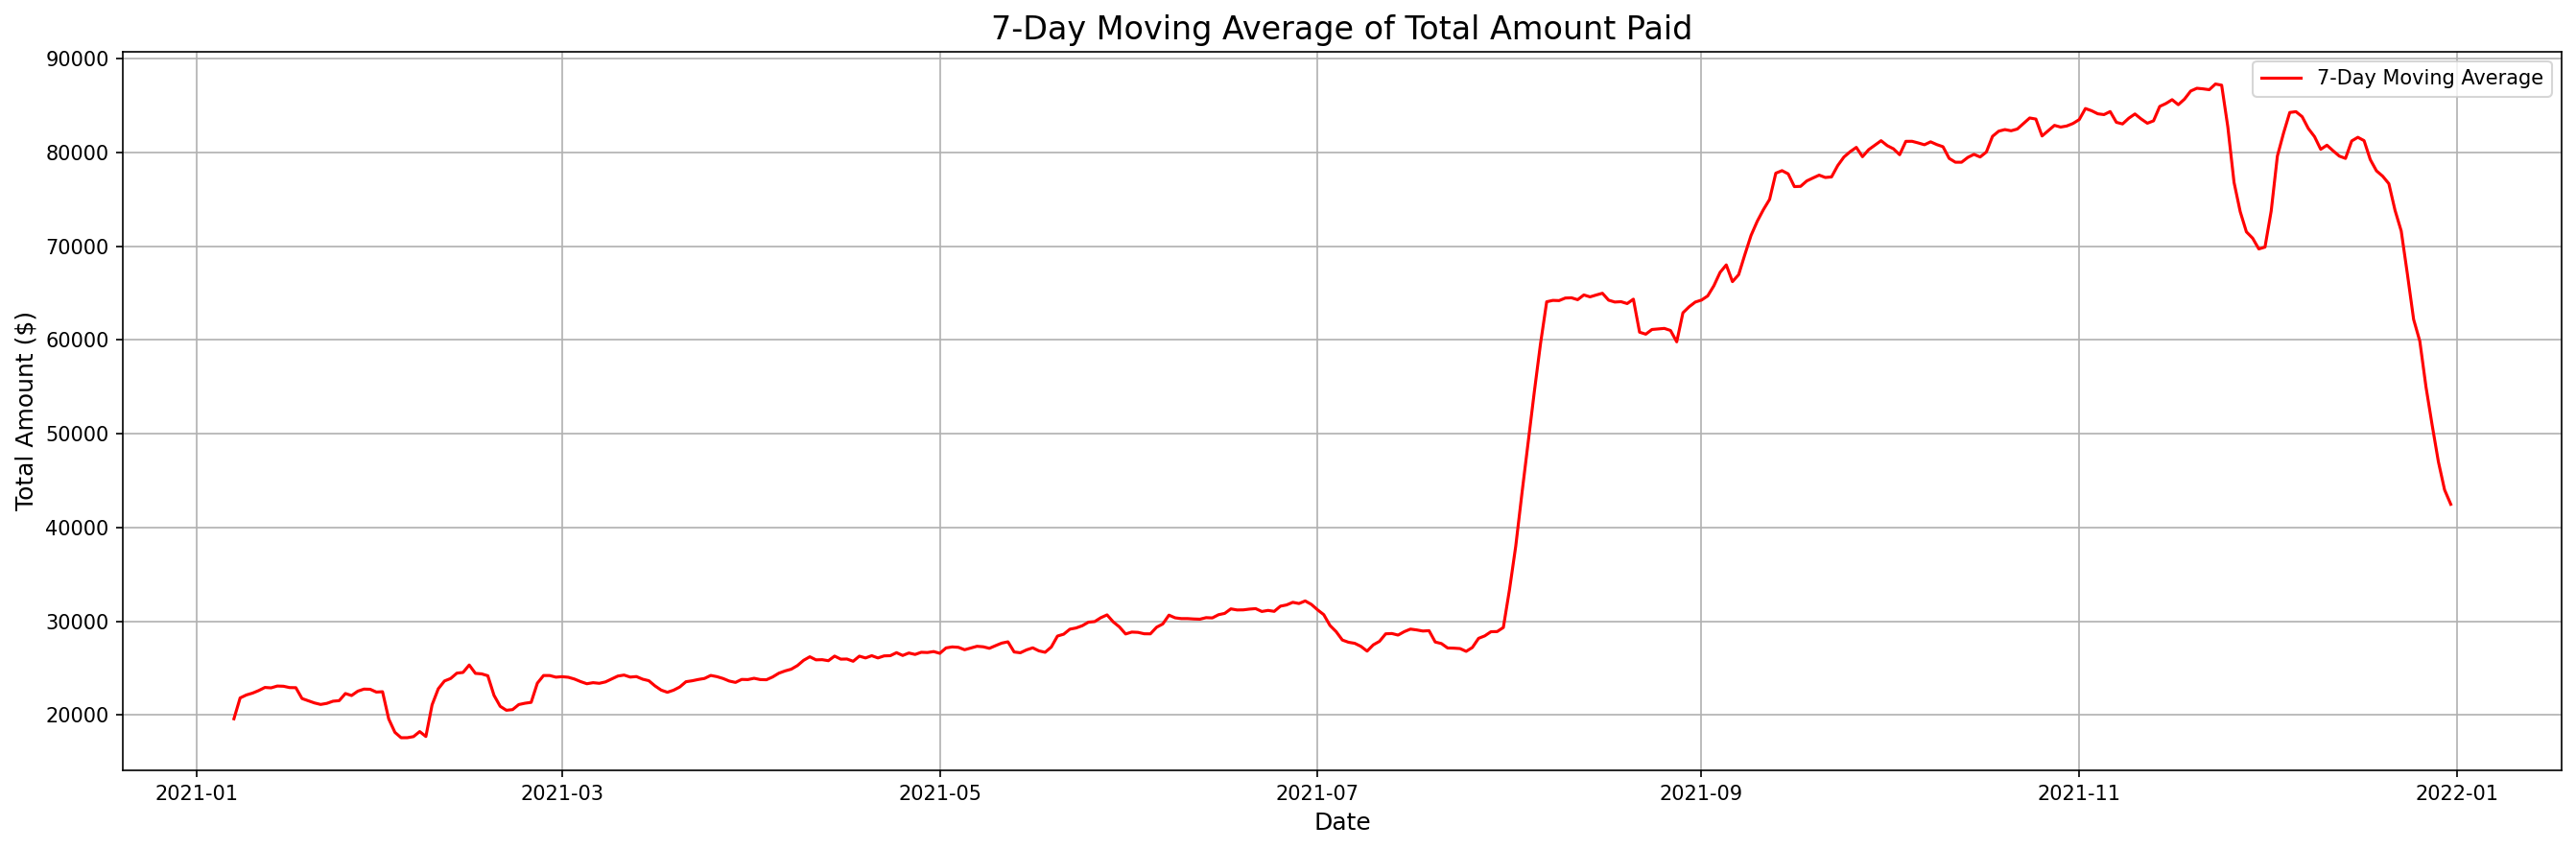

In [40]:
# Plot the rolling average separately
plt.figure(figsize=(18, 6), dpi=150)
plt.plot(daily_total_rolling.index, daily_total_rolling.values,
         color='red', linestyle='-', label='7-Day Moving Average')
plt.title("7-Day Moving Average of Total Amount Paid", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Amount ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
               The time series graph for the total amount of money paid by passengers reveals an interesting pattern. To understand whether this trend is primarily influenced by changes in the number of trips, we will analyze the corresponding time series graph for the number of trips. Comparing these two graphs will help us determine if the observed pattern in total payments is driven by trip volume or other factors are involved.
        </font>
</div>

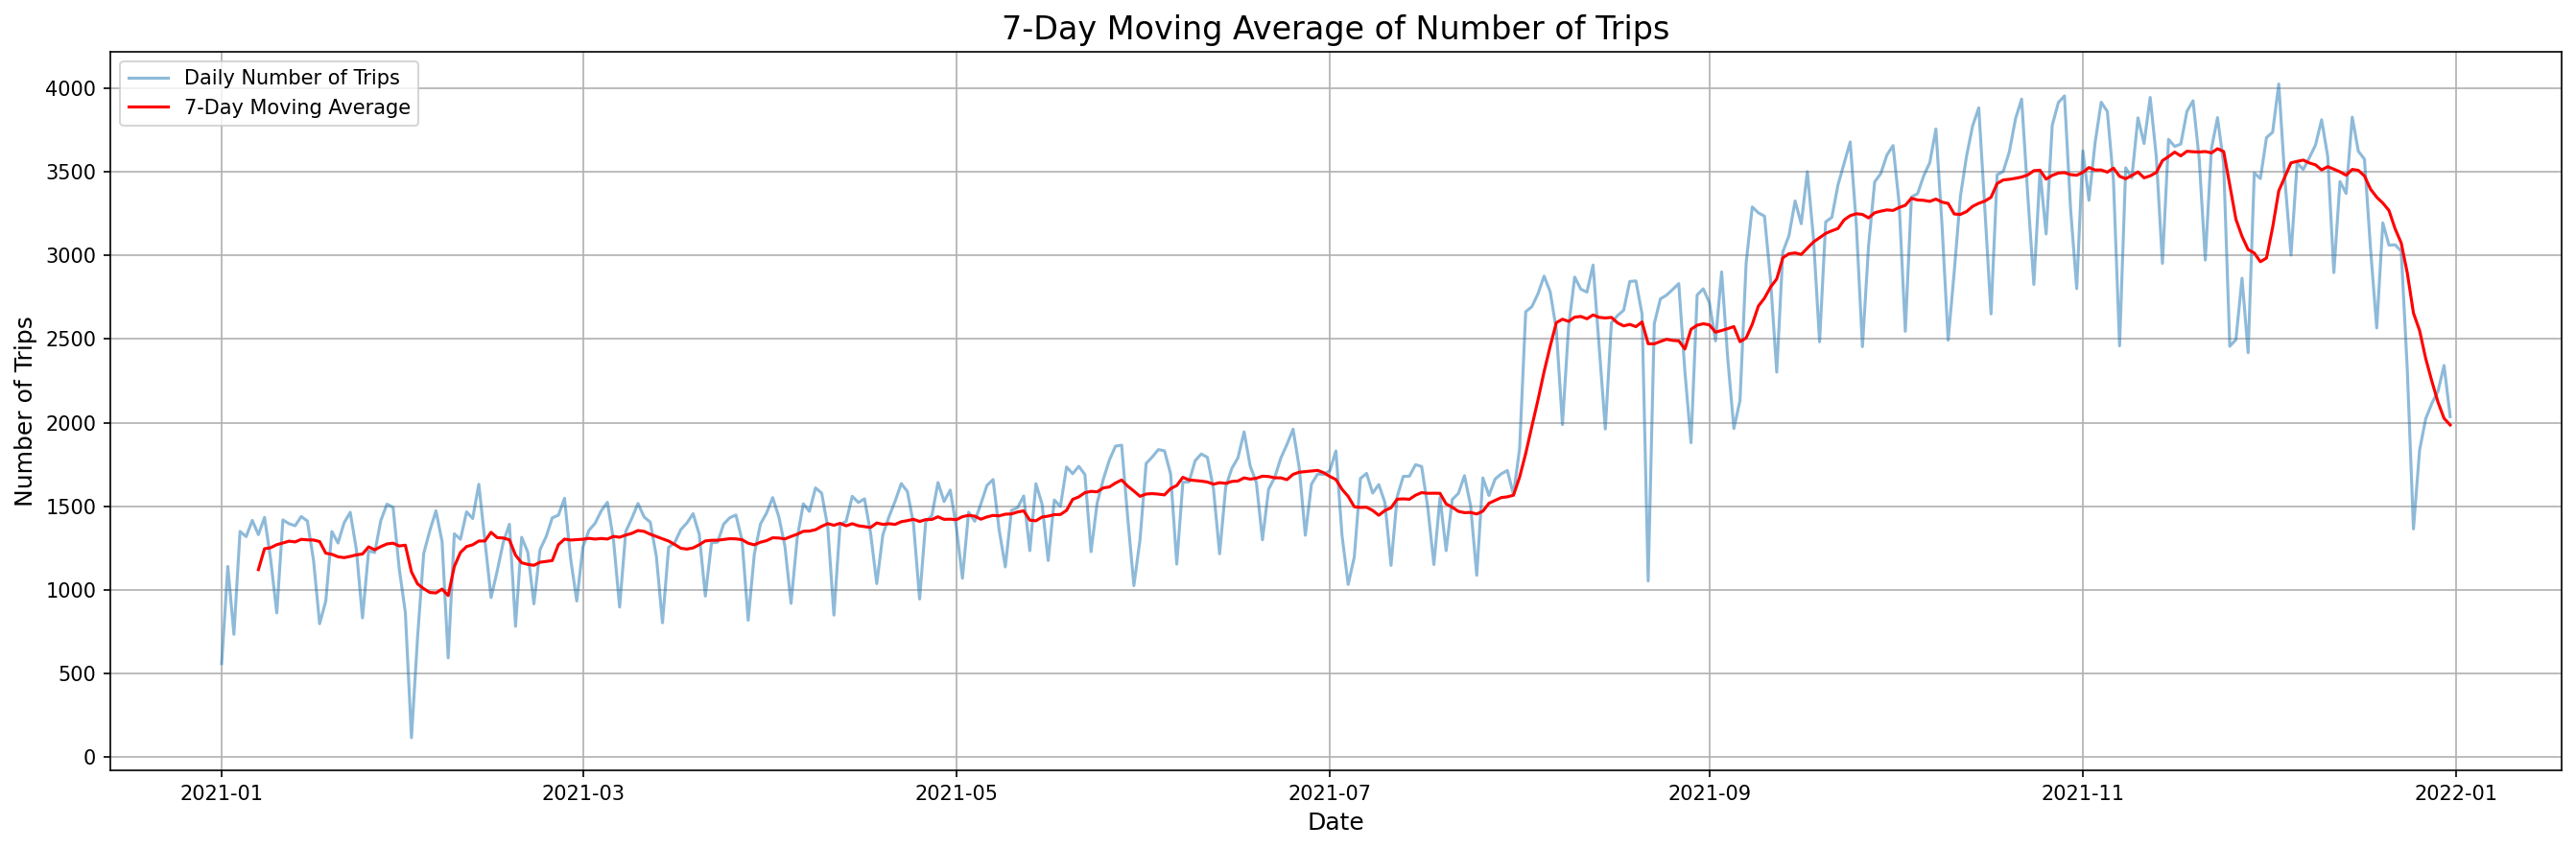

In [41]:
# Group by date and count the number of trips (rows)
daily_trip_counts = df.groupby('date').size().reset_index(name='num_trips')

# Calculate the 7-day moving average for the number of trips
daily_trip_counts['moving_avg'] = daily_trip_counts['num_trips'].rolling(
    window=7).mean()

# Plot the number of trips and 7-day moving average
plt.figure(figsize=(18, 6), dpi=150)
plt.plot(daily_trip_counts['date'], daily_trip_counts['num_trips'],
         label='Daily Number of Trips', alpha=0.5)
plt.plot(daily_trip_counts['date'], daily_trip_counts['moving_avg'],
         label='7-Day Moving Average', color='red')
plt.title("7-Day Moving Average of Number of Trips", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <b> Explaining the trends in total number of trips: </b>
        <ul>
            <p>
               The time series graph for the number of trips shows a trend similar to the total amount of money paid over time. This indicates that the pattern observed in total payments is largely influenced by the trend in number of trips. 
            </p>
             <p>
               We can see a peak around the 8th month and a sharp decline in the end of the year. The peak observed in the 8th month (August) could be attributed to increased travel and activity during the summer months, a common pattern due to vacations, tourism, and favorable weather conditions. The significant increase in trips during the second half of the year compared to the first half may be linked to the easing of restrictions from COVID-19 lockdowns earlier in the year. The decline in the number of trips toward the end of the year likely reflects seasonal changes, such as colder weather and reduced travel activity during the winter months. 
            </p>
             <p>
               As New York can be very cold in winter, seasonal changes can play a significant role in transportation trends. Also, the sharp decline in the number of trips toward the end of the year suggests that seasonal changes, such as colder weather and reduced travel during winter months, may provide a stronger explanation for this trend rather than the impact of COVID-19.
            </p>
        </ul>
    </font>
</div>


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
               In the following graphs, we analyze the trends for each category, segmented by payment type and trip type, to gain deeper insights into their individual patterns over time.
        </font>
</div>

In [42]:
# Group by date and payment_type, summing total_amount
df_total_paytype = df.groupby(['date', 'payment_type'])[
    'total_amount'].sum().reset_index()

# Pivot the grouped data to create separate columns for each payment_type
# Each column is sum of total_amount in that day, for that payment_type
df_total_paytype = df_total_paytype.pivot(
    index='date', columns='payment_type', values='total_amount')

# Replace possible null values with zero, as no trip has been done with that payment_type.
df_total_paytype.fillna(0, inplace=True)

# Create moving average for each column. Each value is the average of sum of total_amount in that day and its previous 7 days for each payment type.
df_moving_avg = df_total_paytype.rolling(window=7).mean()

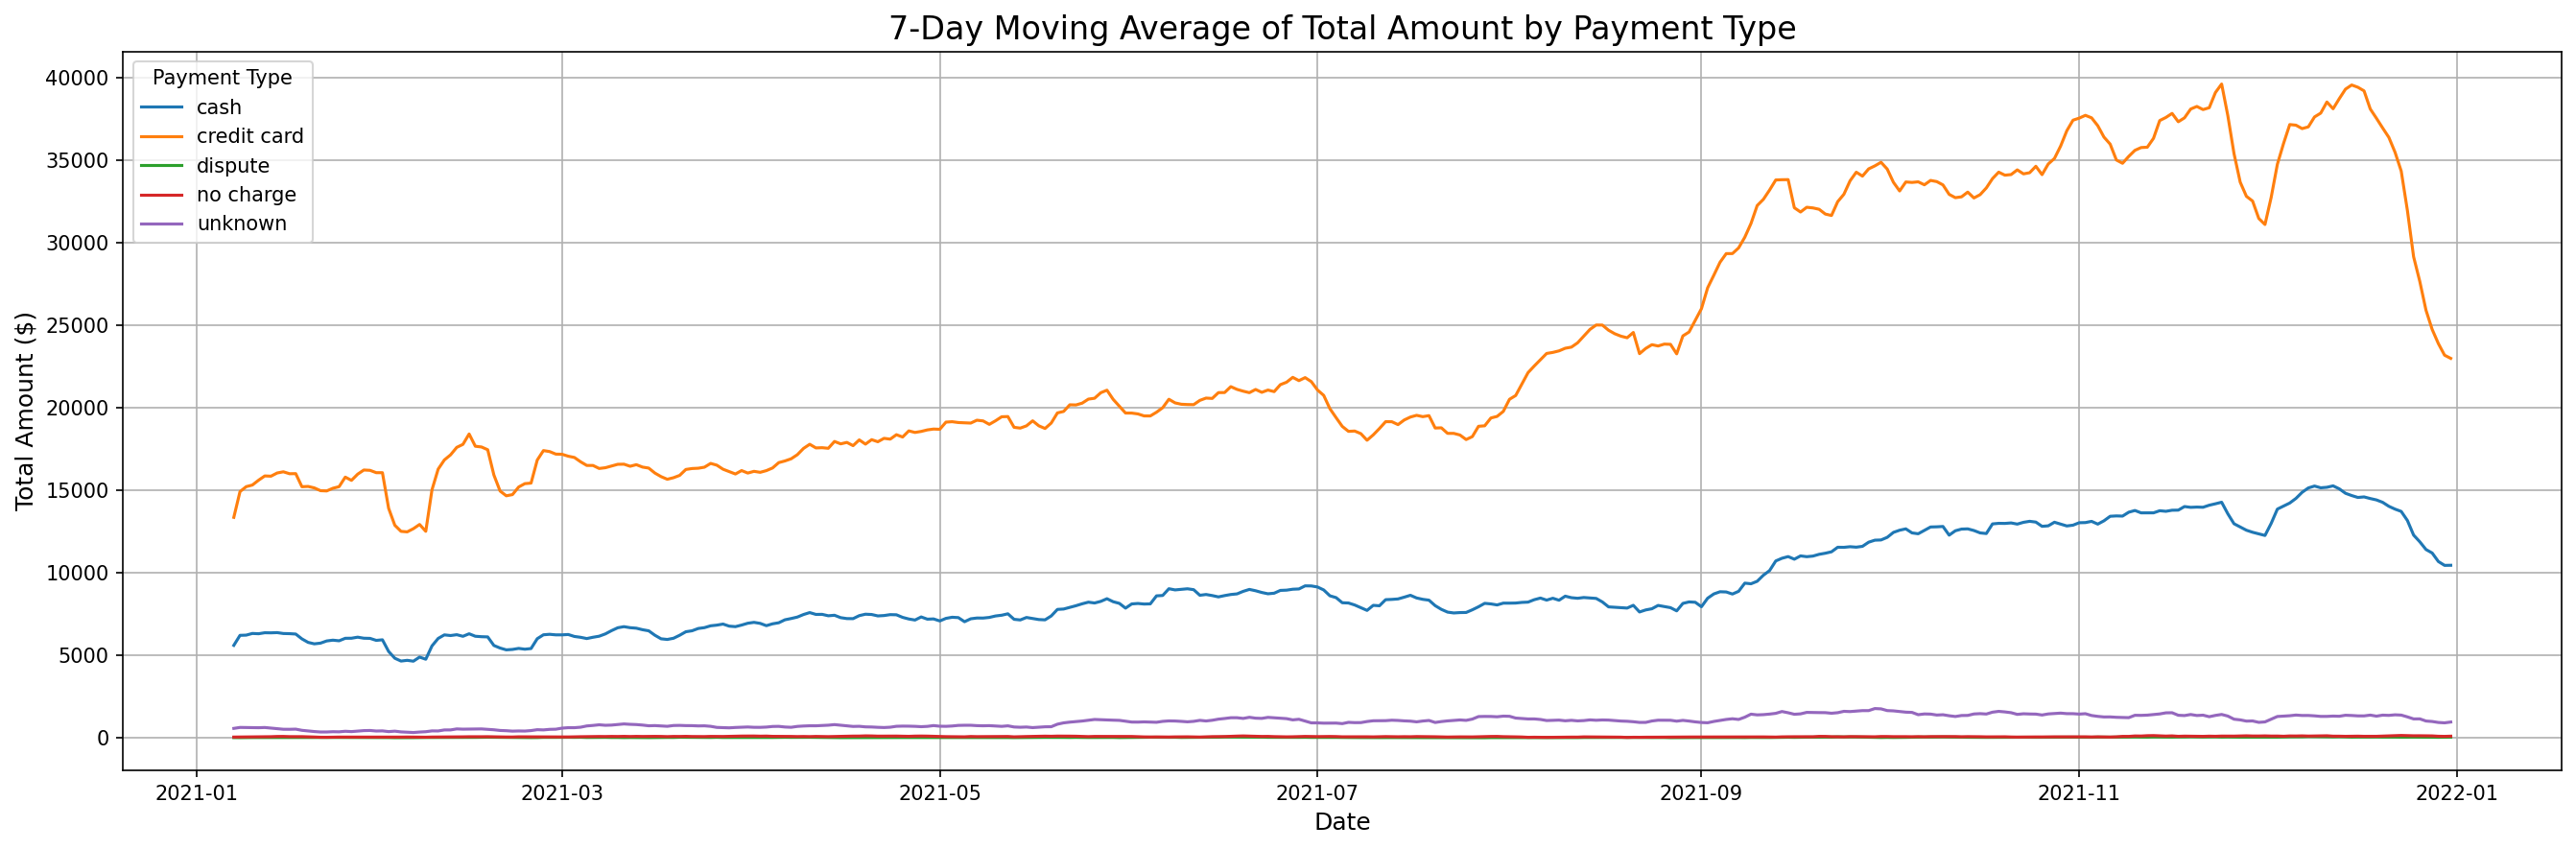

In [43]:
# Plot the moving average for sum of total_amount, and for each payment type
plt.figure(figsize=(18, 6), dpi=150)
for column in df_moving_avg.columns:
    plt.plot(df_moving_avg.index, df_moving_avg[column], label=column)

# Add labels, title, and legend
plt.title("7-Day Moving Average of Total Amount by Payment Type", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Amount ($)", fontsize=12)
plt.legend(title="Payment Type", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        <b> Explanation of the graph: </b>
The graph highlights that credit card payments contribute the largest share of total payments, with a steady increase throughout the year and a peak around the 8th month, followed by a sharp decline toward the end of the year. Cash payments exhibit a more gradual increase over time, with less volatility compared to credit card payments. The trends align with the pattern observed in the number of trips, and as mentioned earlier, these changes are likely influenced by seasonal factors such as summer travels and colder winter months.
        </font>
</div>

In [44]:
# Group by date and trip_type, count the number of trips
df_trip_counts = df.groupby(
    ['date', 'trip_type']).size().reset_index(name='num_trips')

# Pivot the grouped data to create separate columns for each trip_type
# Each column is number of trips in that day, for that trip_type
df_trip_counts = df_trip_counts.pivot(
    index='date', columns='trip_type', values='num_trips')

# Replace possible null values with zero, as no trip has been done with that trip_type
df_trip_counts.fillna(0, inplace=True)

# Create moving average for each column. Each value is the average of sum of total_amount in that day and its previous 7 days for each payment type.
df_moving_avg = df_trip_counts.rolling(window=7).mean()

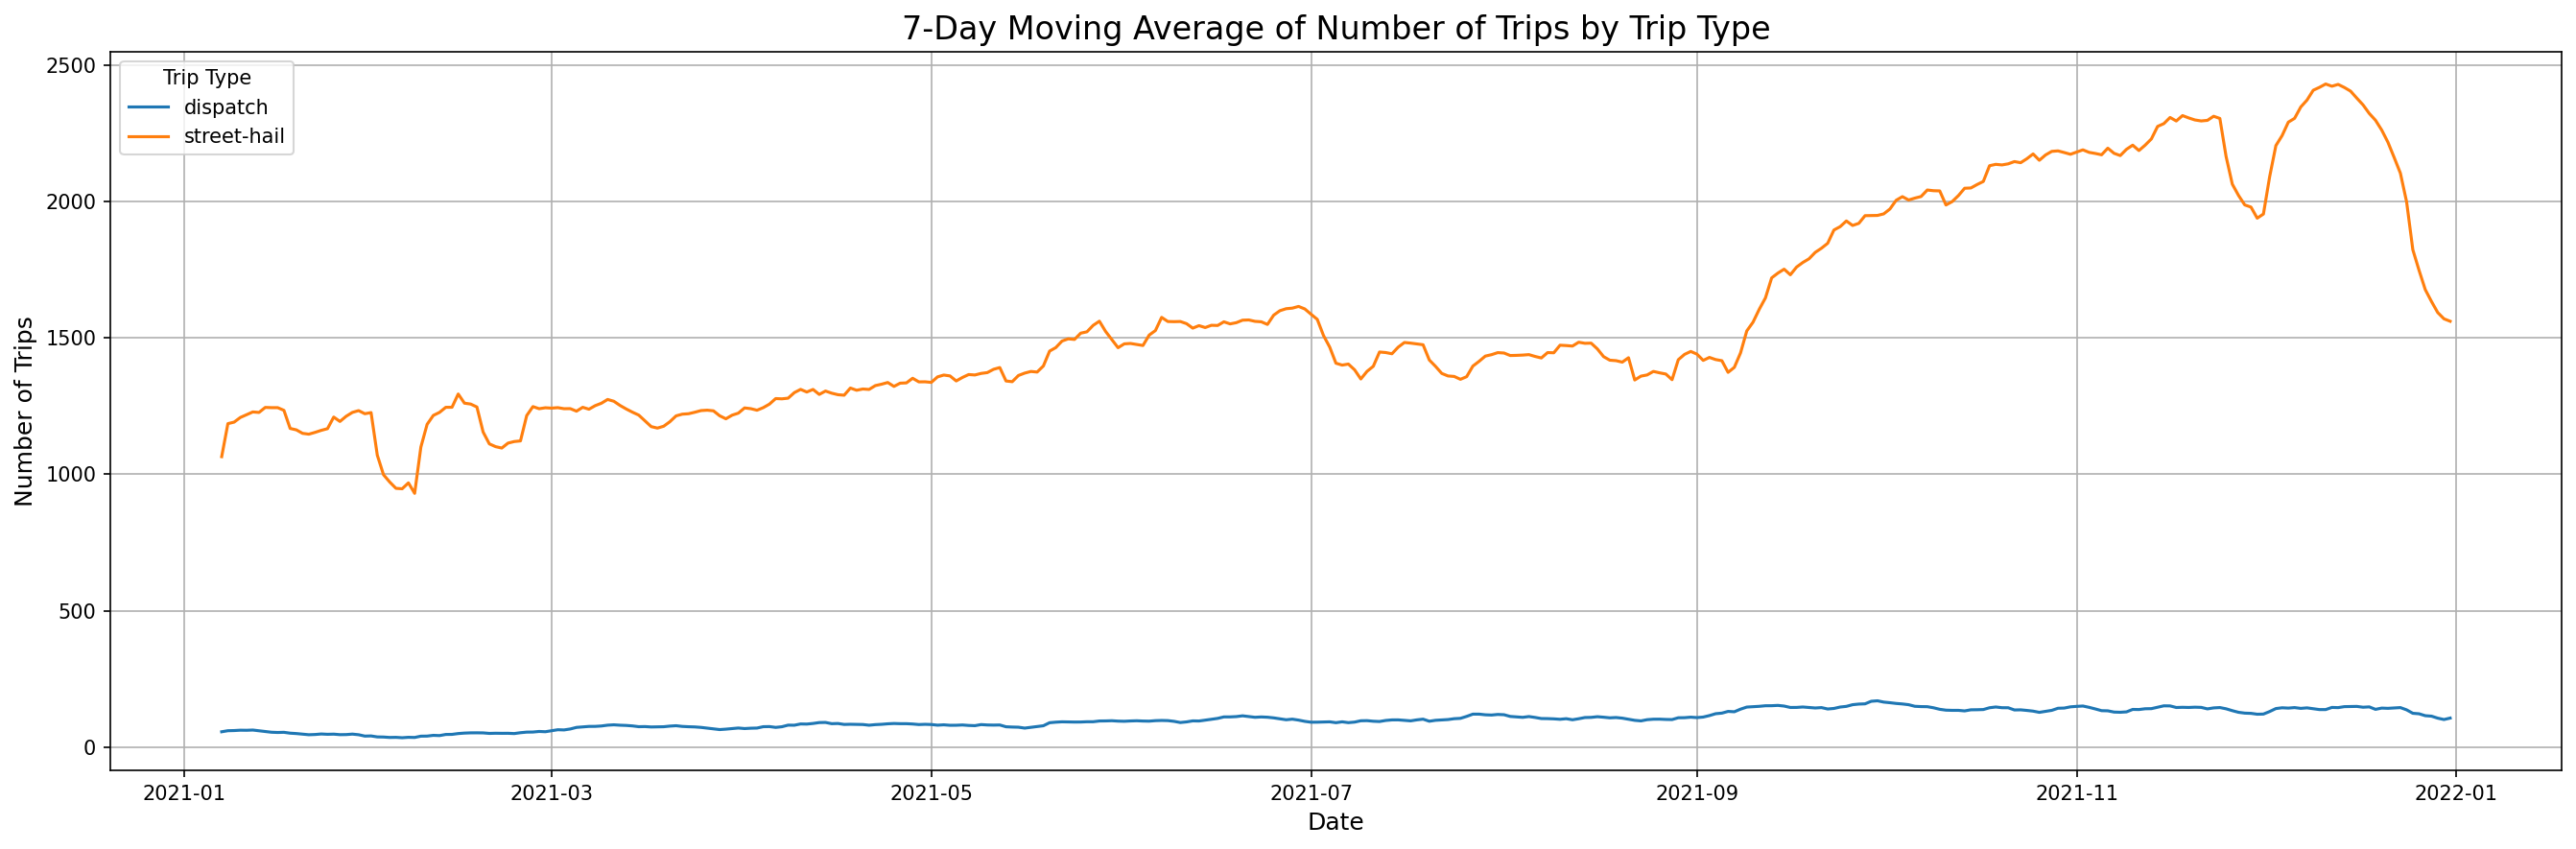

In [45]:
# Plot the moving average for sum of total_amount, and for each trip type
plt.figure(figsize=(18, 6), dpi=150)
for column in df_moving_avg.columns:
    plt.plot(df_moving_avg.index, df_moving_avg[column], label=column)

# Add labels, title, and legend
plt.title("7-Day Moving Average of Number of Trips by Trip Type", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.legend(title="Trip Type", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <br />
        <p>First, we will explain the meaning of the two trip types:</p>
        <ul>
            <li> <b> Dispatch: </b> These trips are pre-arranged and booked in advance, often through a phone call, mobile app, or other electronic means. The passenger requests the taxi to pick them up from a specific location at a scheduled time. Dispatch trips are common for services like airport pickups or planned rides. </li>
            <li> <b> Street-hail: </b> These trips occur when a passenger flags down or hails a taxi directly from the street without any prior booking. Street-hail trips are spontaneous and depend on the availability of taxis in the vicinity. This is the traditional way of hiring taxis in busy urban areas. </li>
        <p>
            <b >Explanation of the Graph: </b>         
             The trends in the total number of trips are primarily driven by the pattern of street-hail trips. As discussed earlier, these trends are likely influenced by seasonal factors, with street-hail trips being more sensitive to such changes. For example, people waiting for taxis on the street are less likely to do so in cold weather, leading to a decline in street-hail trips during the winter months. In contrast, dispatch trips, which are typically pre-planned, remain relatively stable throughout the year, as they are less affected by seasonal variations.
        </p>
        </ul>
    </font>
</div>


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        Now we aim to visualize the number of trips for both payment type and trip type to better understand the proportion of trips associated with each category.
        </font>
</div>

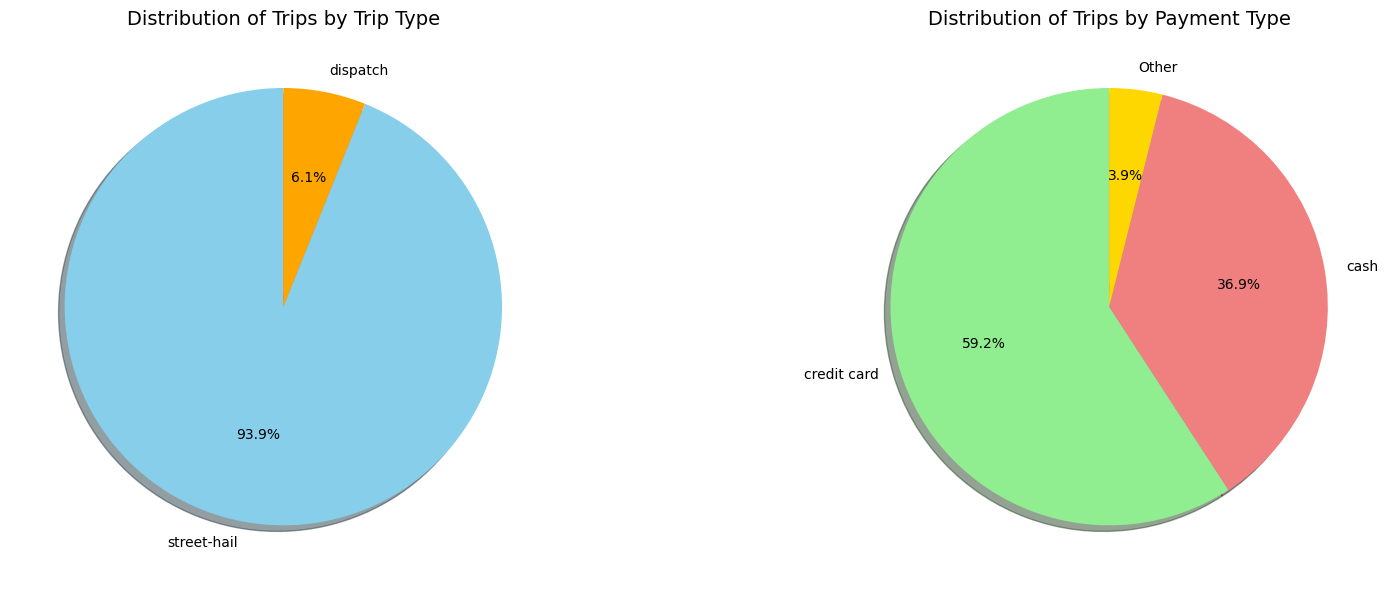

In [46]:
# Group and count number of trips for trip_type and payment_type
trip_type_counts = df['trip_type'].value_counts()
payment_type_counts = df['payment_type'].value_counts()

# Add three categories (no charge, dispute, unknown) together and define them as 'other'
top_categories = payment_type_counts.head(2)
other_sum = payment_type_counts.iloc[2:].sum()
payment_type_counts = pd.concat(
    [top_categories, pd.Series({'Other': other_sum})])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart for trip_type
axes[0].pie(trip_type_counts, labels=trip_type_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['skyblue', 'orange'], shadow=True)
axes[0].set_title('Distribution of Trips by Trip Type', fontsize=14)

# Pie chart for payment_type
axes[1].pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['lightgreen', 'lightcoral', 'gold', 'purple', 'cyan'], shadow=True)
axes[1].set_title('Distribution of Trips by Payment Type', fontsize=14)

plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        The majority of trips are street-hail, which is the traditional method of hailing a taxi in urban areas. Most passengers (61.5%) prefer to pay for their trips using credit cards, although cash remains a widely used payment method.
        </font>
</div>

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        We will now import the file containing LocationIDs and their corresponding regions to assign the origin and destination regions to each trip. This information will be used for further analysis and visualization.
        </font>
</div>

In [47]:
# Read the file that assigns LocationID to different regions
locations_file = 'Boroughs.csv'
locations_df = pd.read_csv(locations_file)

In [48]:
# Merge trips data with location data (for both pickup and dropoff locations)
# The name of the new column will be the same as the one in the original file
df_merged = df.merge(locations_df, left_on='PULocationID',
                     right_on='LocationID', how='left', suffixes=('', '_pickup'))

# Suffixes will be applied when already there is a column with that name
df_merged = df_merged.merge(locations_df, left_on='DOLocationID',
                            right_on='LocationID', how='left', suffixes=('', '_dropoff'))

df_merged.drop(columns=['LocationID', 'LocationID_dropoff'], inplace=True)
df_merged.rename(columns={'Borough': 'pickup_region',
                 'Borough_dropoff': 'dropoff_region'}, inplace=True)

In [49]:
df_merged.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,tip_amount,tolls_amount,total_amount,...,trip_time_in_minutes,speed,hour,weekday,monthday,month,is_holiday,date,pickup_region,dropoff_region
0,VeriFone,2021-01-01 00:15:56,2021-01-01 00:19:52,43,151,1.0,1.01,0.00,0.0,6.80,...,3.933333,0.256780,0,Friday,1,1,True,2021-01-01,Manhattan,Manhattan
1,VeriFone,2021-01-01 00:25:59,2021-01-01 00:34:44,166,239,1.0,2.53,2.81,0.0,16.86,...,8.750000,0.289143,0,Friday,1,1,True,2021-01-01,Manhattan,Manhattan
2,VeriFone,2021-01-01 00:45:57,2021-01-01 00:51:55,41,42,1.0,1.12,1.00,0.0,8.30,...,5.966667,0.187709,0,Friday,1,1,True,2021-01-01,Manhattan,Manhattan
3,VeriFone,2021-01-01 00:26:31,2021-01-01 00:28:50,75,75,6.0,0.45,0.96,0.0,5.76,...,2.316667,0.194245,0,Friday,1,1,True,2021-01-01,Manhattan,Manhattan
4,VeriFone,2021-01-01 00:58:32,2021-01-01 01:32:34,225,265,1.0,12.19,2.75,0.0,42.05,...,34.033333,0.358178,0,Friday,1,1,True,2021-01-01,Brooklyn,Manhattan


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        We will now plot time series graphs for each region to analyze the trends in taxi usage over time across different zones.
        </font>
</div>

In [50]:
# Group by date and trip_type, count the number of trips
df_trip_counts = df_merged.groupby(
    ['date', 'pickup_region']).size().reset_index(name='num_trips')

# Pivot the grouped data to create separate columns for each trip_type
# Each column is number of trips in that day, for that trip_type
df_trip_counts = df_trip_counts.pivot(
    index='date', columns='pickup_region', values='num_trips')

# Replace possible null values with zero, as no trip has been done with that trip_type
df_trip_counts.fillna(0, inplace=True)

# Create moving average for each column. Each value is the average of sum of total_amount in that day and its previous 7 days for each payment type.
df_moving_avg = df_trip_counts.rolling(window=7).mean()

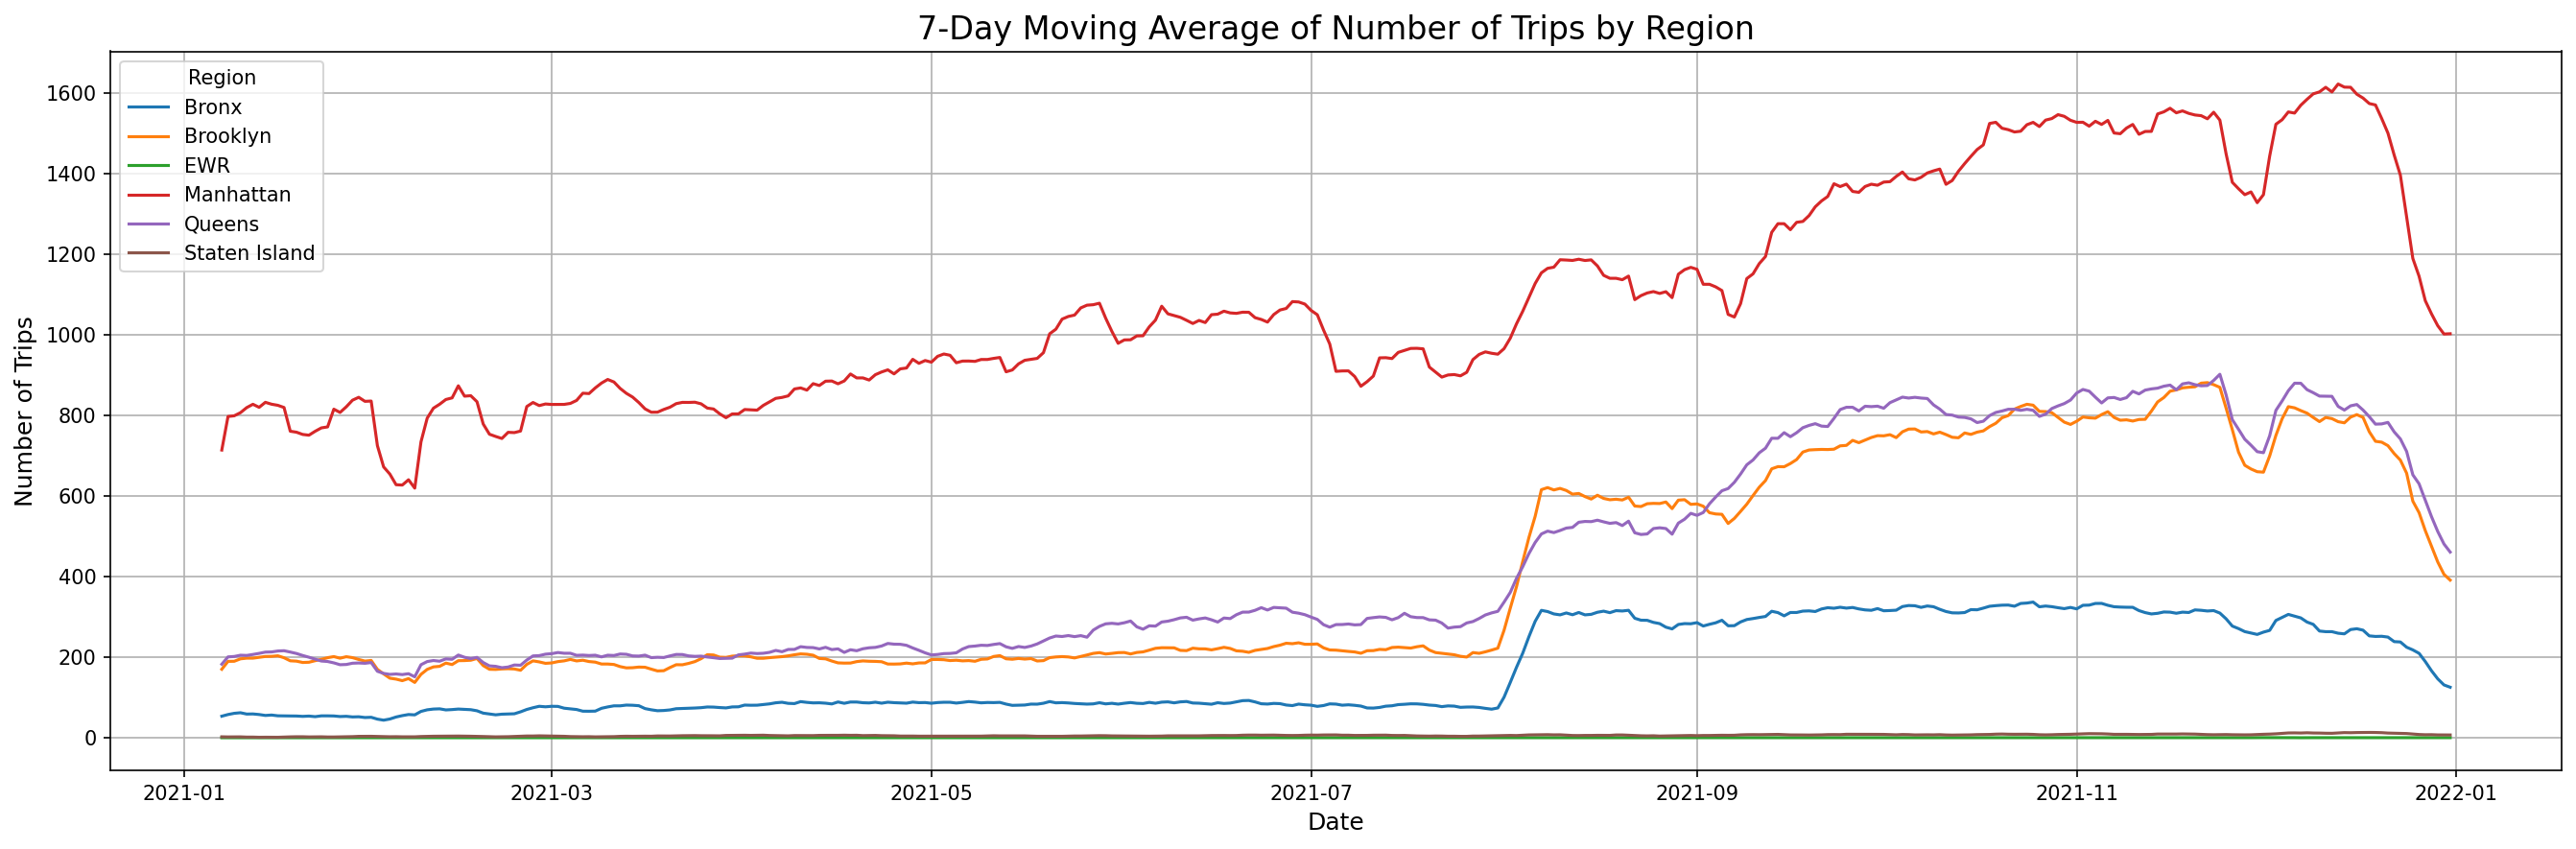

In [51]:
# Plot the moving average for sum of total_amount, and for each trip type
plt.figure(figsize=(18, 6), dpi=150)
for column in df_moving_avg.columns:
    plt.plot(df_moving_avg.index, df_moving_avg[column], label=column)

# Add labels, title, and legend
plt.title("7-Day Moving Average of Number of Trips by Region", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.legend(title="Region", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        As we can see, the trends in the number of trips over time in each region are consistent with the overall trend in total trips. This indicates that seasonal factors and patterns are observable across all regions, except for Staten Island and EWR, where the number of trips remains very low.
        </font>
</div>

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        We will now visualize the total number of trips in each hour for each region using a heatmap. This will help us observe the hourly trends in the number of trips across different regions.
        </font>
</div>

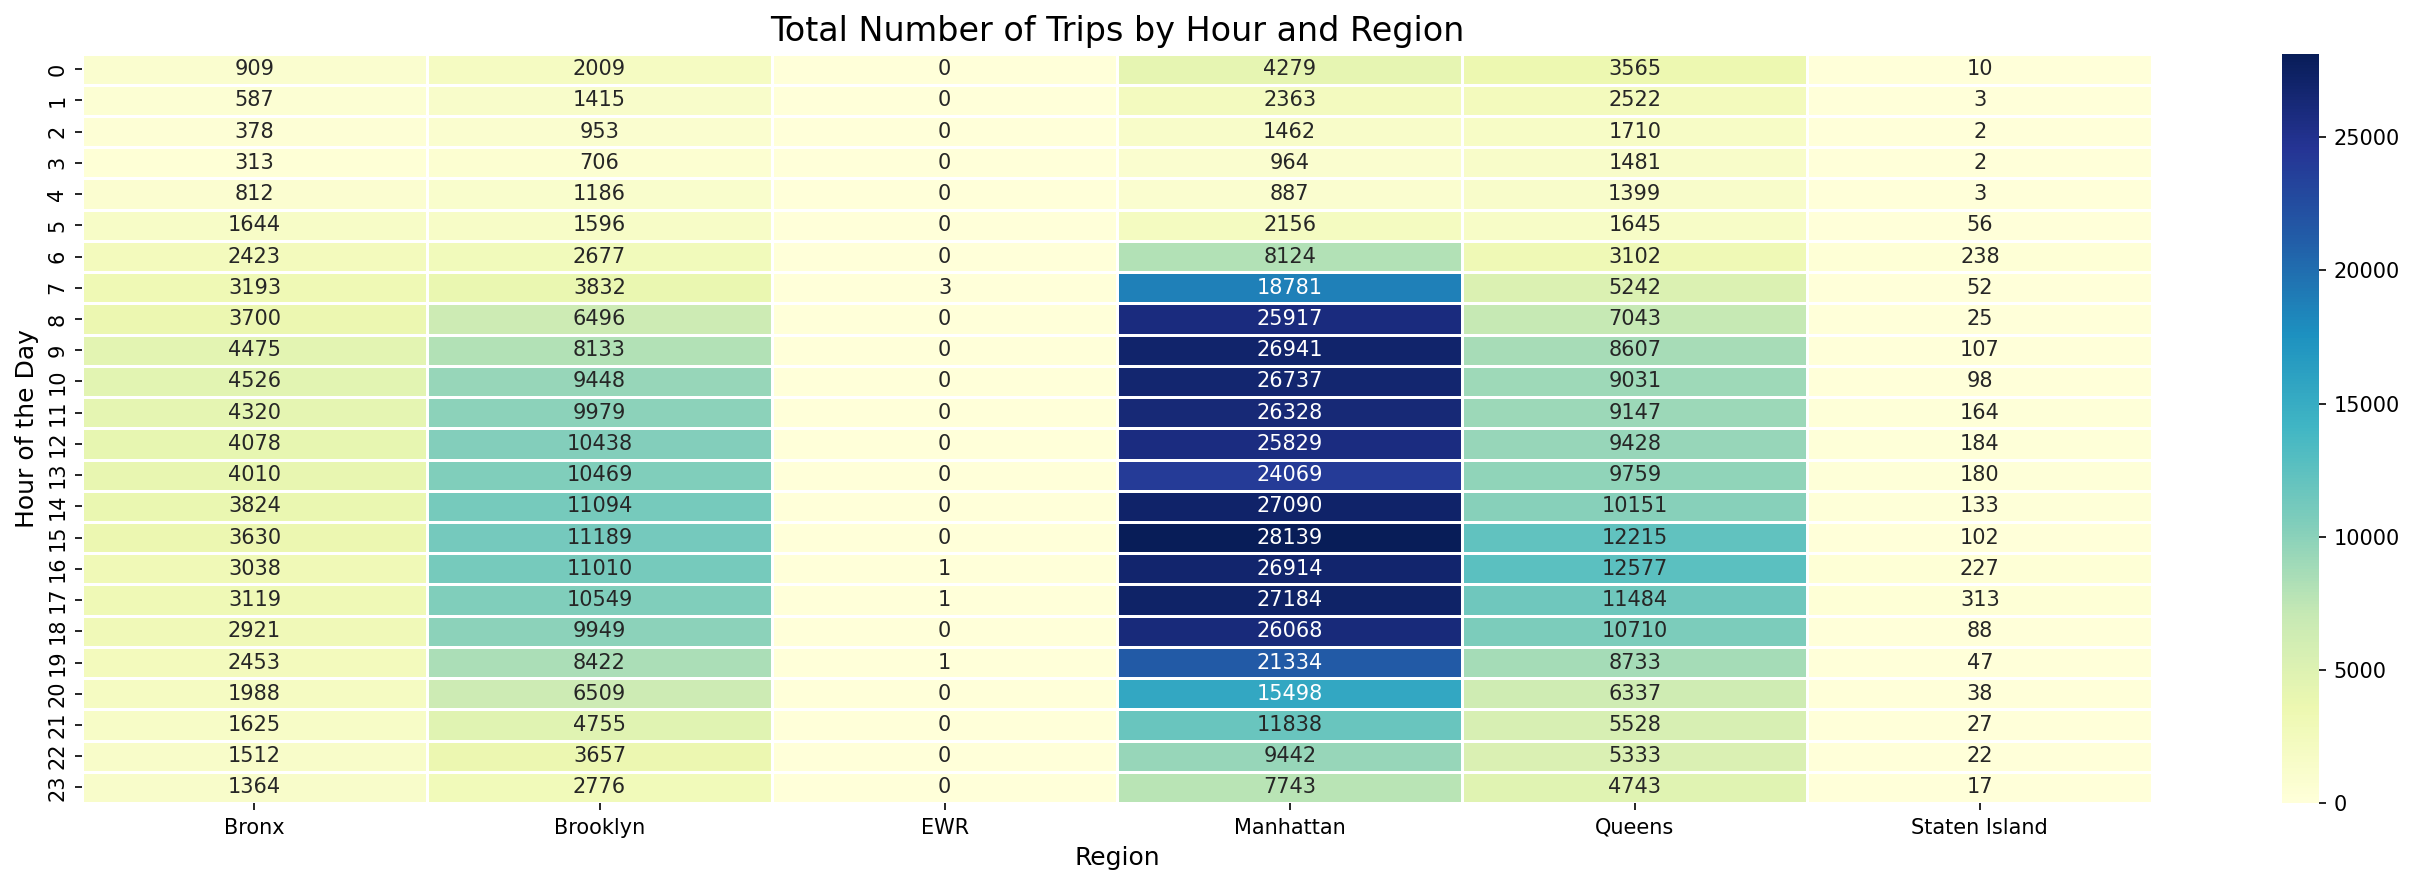

In [52]:
hourly_region_data = df_merged.groupby(
    ['hour', 'pickup_region']).size().reset_index(name='num_trips')

# Pivot the data for heatmap format
heatmap_data = hourly_region_data.pivot(
    index='hour', columns='pickup_region', values='num_trips')

# Replace possible null values with zero, as no trip has been done with that trip_type
heatmap_data.fillna(0, inplace=True)

# Plot the heatmap
plt.figure(figsize=(18, 6), dpi=150)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True,
            fmt=".0f", cbar=True, linewidths=0.5)
plt.title("Total Number of Trips by Hour and Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)
plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        This heatmap shows the hourly distribution of trips across different regions. The trend in the number of trips for various hours closely follows the overall trend, indicating that all regions conform to the general pattern and no region deviates significantly. Additionally, we observe a peak in trips from 7 AM to 7 PM, reflecting the typical active hours for transportation.
        </font>
</div>

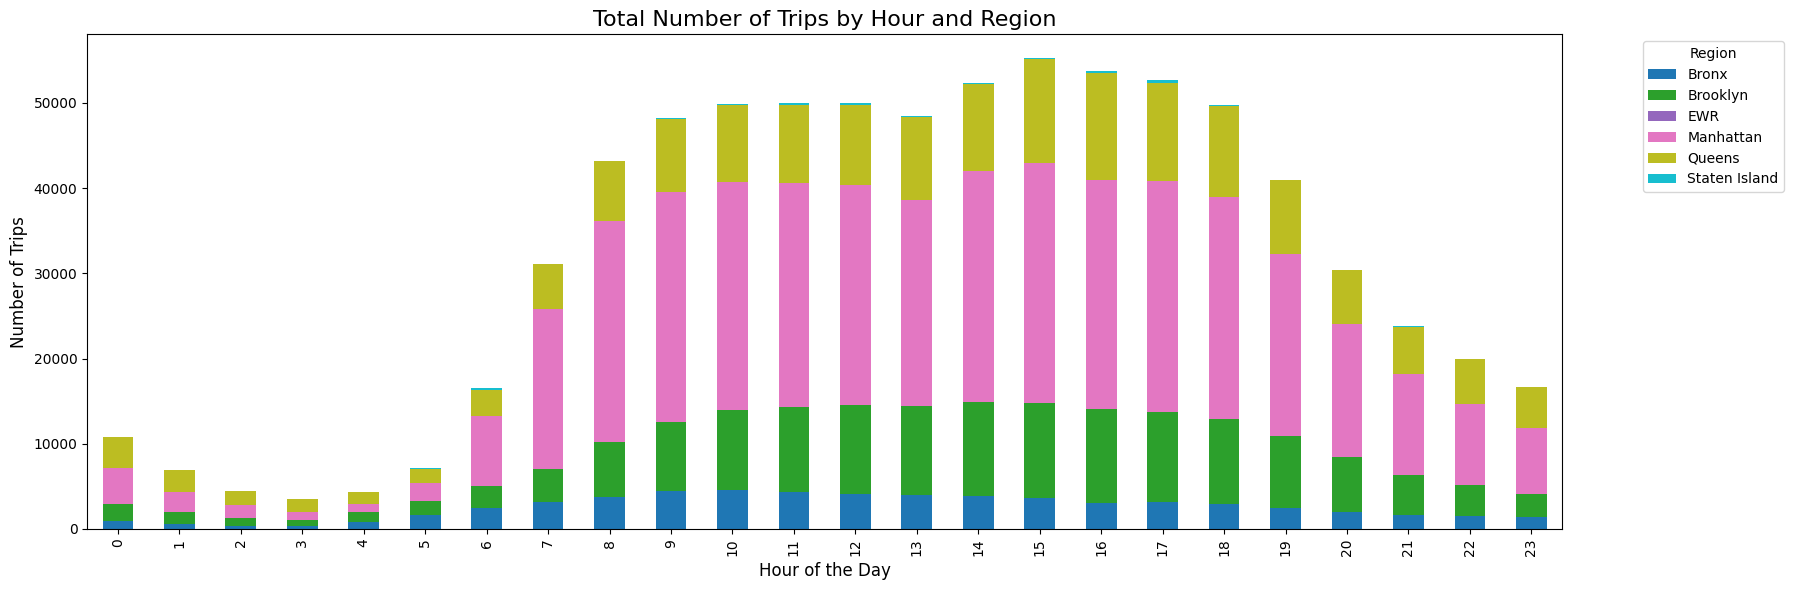

In [53]:
hourly_region_data = df_merged.groupby(
    ['hour', 'pickup_region']).size().reset_index(name='num_trips')
barchart_data = hourly_region_data.pivot(
    index='hour', columns='pickup_region', values='num_trips')

# Replace possible null values with zero, as no trip has been done with that trip_type
barchart_data.fillna(0, inplace=True)

# Plot the stacked bar chart
barchart_data.plot(kind='bar', stacked=True, figsize=(18, 6), cmap="tab10")
plt.title("Total Number of Trips by Hour and Region", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        The stacked bar chart presents the same information as the heatmap but offers a clearer view of both the overall trend in the number of trips across different hours and the specific trends for each region simultaneously. As shown, the trends in all regions align with the general pattern, with the majority of trips occurring between 7 AM and 7 PM.
        </font>
</div>

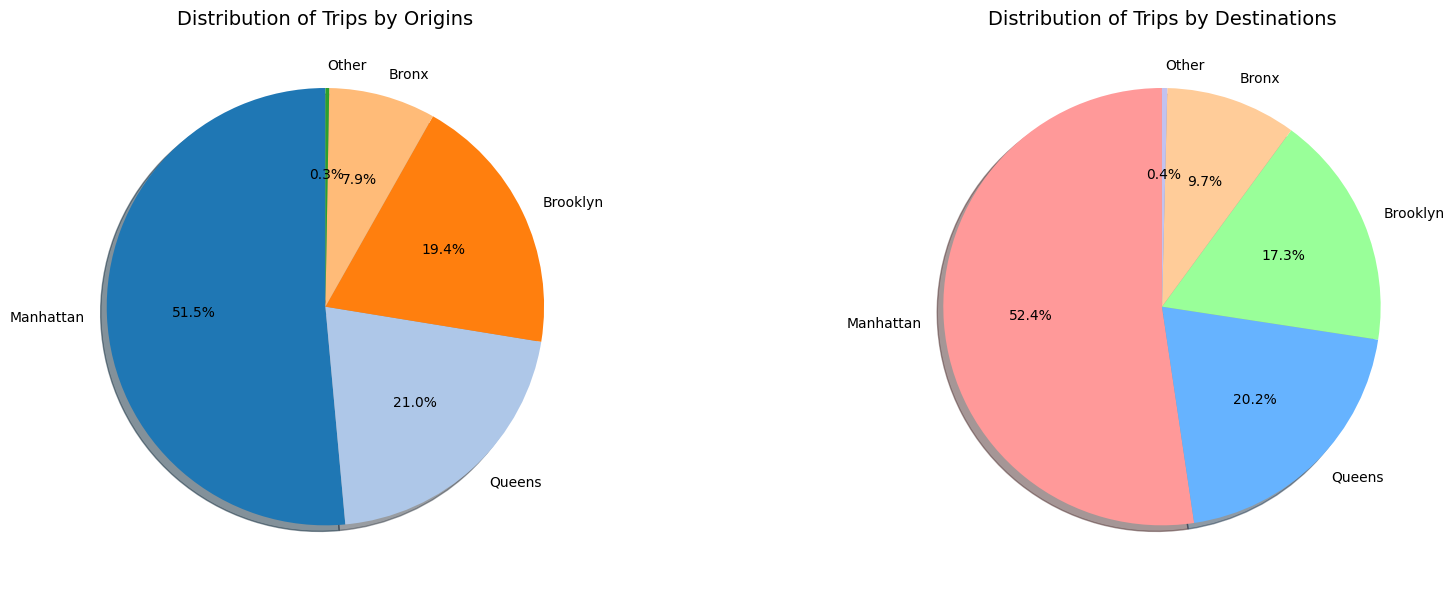

In [54]:
# Group and count number of trips for trip_type and payment_type
origin_counts = df_merged['pickup_region'].value_counts()
destination_counts = df_merged['dropoff_region'].value_counts()

# Add two regions (Staten Island and EWR) together and define them as 'other'
# For origins:
top_categories = origin_counts.head(4)
other_sum = origin_counts.iloc[4:].sum()
origin_counts = pd.concat([top_categories, pd.Series({'Other': other_sum})])

# For destinations:
top_categories = destination_counts.head(4)
other_sum = destination_counts.iloc[4:].sum()
destination_counts = pd.concat(
    [top_categories, pd.Series({'Other': other_sum})])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart for trip_type
axes[0].pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90,
            shadow=True, colors=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c'])
axes[0].set_title('Distribution of Trips by Origins', fontsize=14)

# Pie chart for payment_type
axes[1].pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%',
            startangle=90, shadow=True, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
axes[1].set_title('Distribution of Trips by Destinations', fontsize=14)

plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        <p>
        The above graphs illustrate the proportion of trips across different regions. We observe that the proportions of trips by origin and destination are nearly identical, indicating that most trips originating from a region likely end within the same region. This assumption can be further evaluated using the OD matrix.
        </p>
        <p>
          Manhattan accounts for more than half of the trips as both an origin and destination, reflecting its role as the primary hub for taxi activity. Following Manhattan, Queens, Brooklyn, and the Bronx form the next significant centers of activity. In contrast, Staten Island and EWR represent a very small fraction of the total trips, emphasizing their limited contribution to the overall taxi traffic.  
        </p>
        </font>
</div>

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            OD Matrix
        </font>
        <br />
    </font>
</div>


In [55]:
# Group by origin (pickup_region) and destination (dropoff_region), counting trips
od_matrix_data = df_merged.groupby(
    ['dropoff_region', 'pickup_region']).size().reset_index(name='num_trips')

# Pivot the data to create an OD matrix
od_matrix = od_matrix_data.pivot(
    index='pickup_region', columns='dropoff_region', values='num_trips')

# Replace possible null values with zero, as no trip has been done with that trip_type
od_matrix.fillna(0, inplace=True)

od_matrix.head(10)

dropoff_region,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
pickup_region,,,,,,
Bronx,35765.0,4567.0,6.0,15776.0,4354.0,374.0
Brooklyn,4415.0,107783.0,221.0,22233.0,13335.0,1260.0
EWR,0.0,0.0,3.0,3.0,0.0,0.0
Manhattan,29357.0,7467.0,174.0,346976.0,11797.0,316.0
Queens,4595.0,12868.0,15.0,17730.0,125927.0,357.0
Staten Island,326.0,866.0,5.0,304.0,361.0,276.0


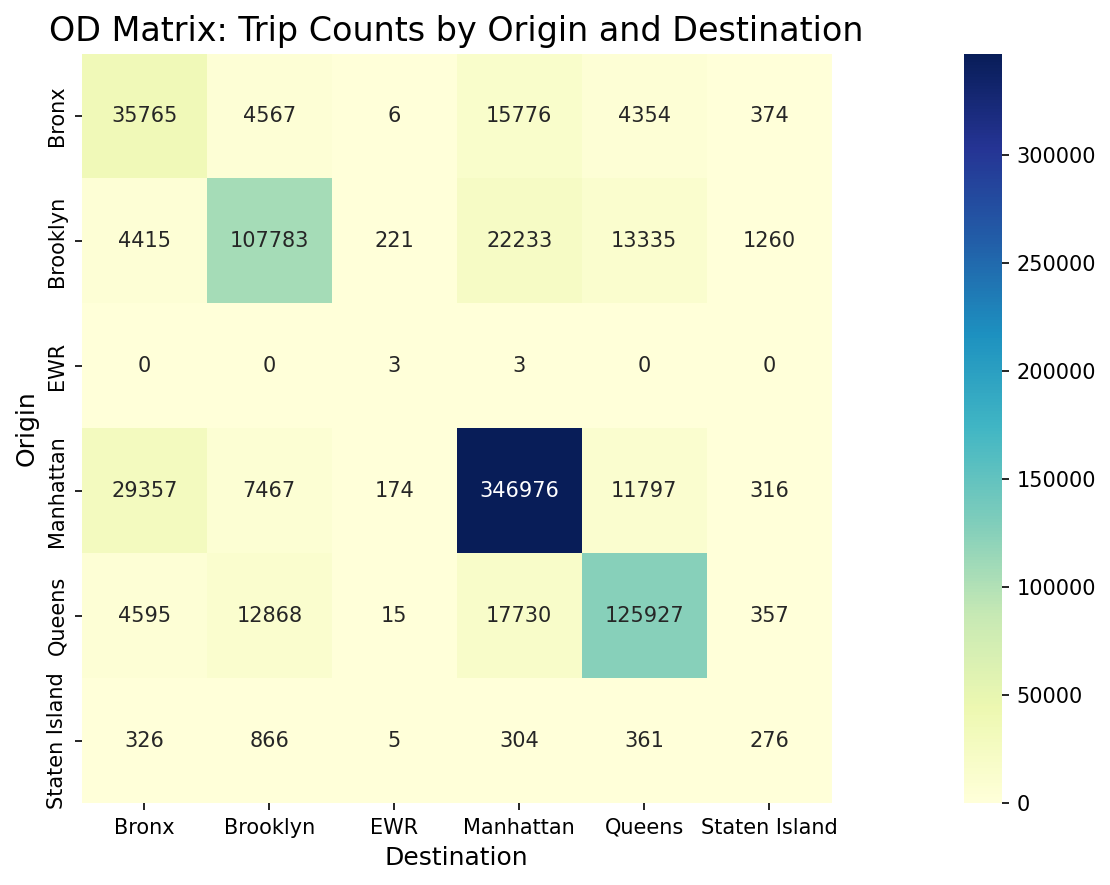

In [56]:
# Plot the heatmap for OD Matrix
plt.figure(figsize=(18, 6), dpi=150)
sns.heatmap(od_matrix, cmap="YlGnBu", square=True,
            cbar=True, annot=True, fmt=".0f")
plt.title("OD Matrix: Trip Counts by Origin and Destination", fontsize=16)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Origin", fontsize=12)
plt.tight_layout()
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
        <p>
        The OD matrix confirms that most trips have the same origin and destination. The highest trip counts are from Manhattan to Manhattan, Queens to Queens, and Brooklyn to Brooklyn, validating the assumption made from the pie chart. This indicates that a significant portion of trips are intra-regional, with people primarily traveling within the same region rather than between different regions.
        </p>
        <p>
          The OD matrix also shows that for all regions except Staten Island, the largest number of trips are intra-region trips, meaning that people primarily travel within the same region. Staten Island, on the other hand, has significantly fewer trips overall, and its trip distribution does not follow the same pattern as the other regions.
        </p>
        </font>
</div>

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltl;line-height:300%;">
	<font face="XB Zar" size=4>
		<font color='crimson' size=7>
            Section 3
        </font>
	</font>
</div>

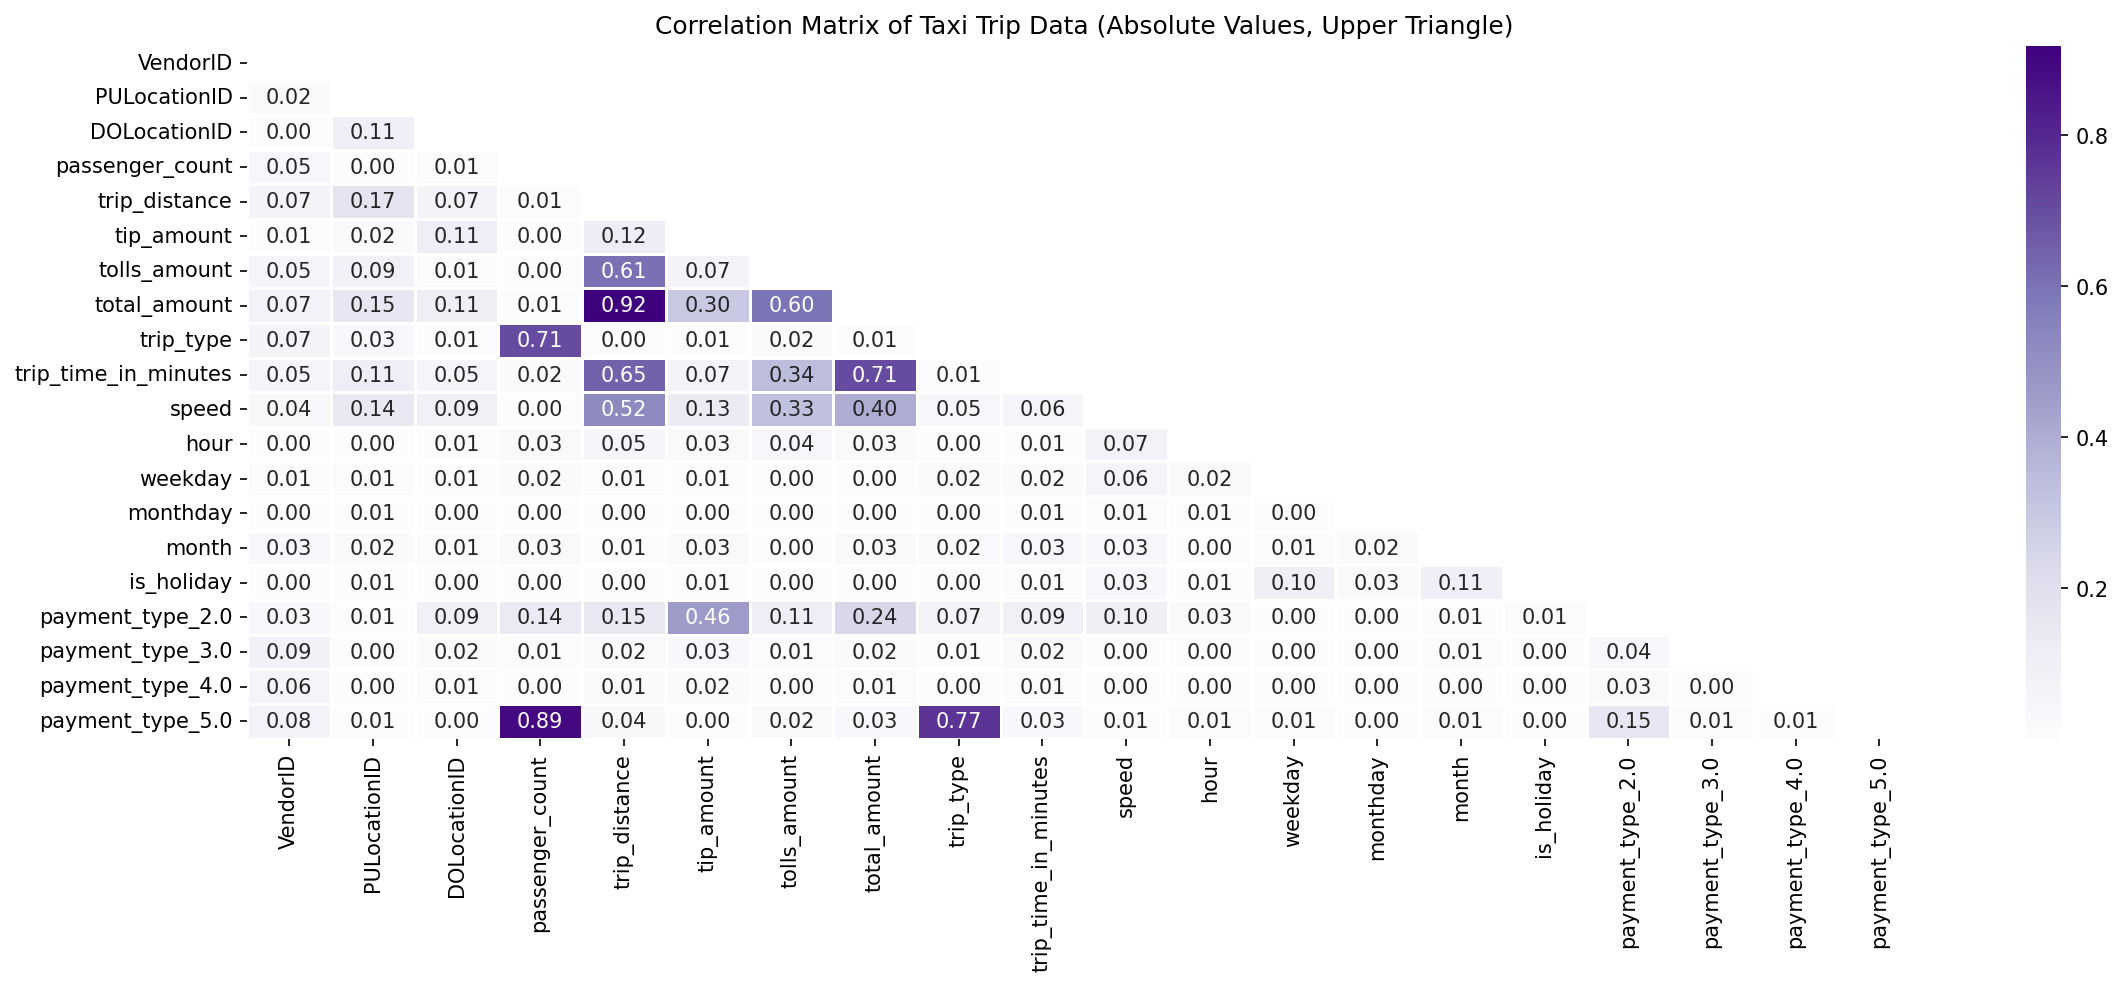

In [57]:
corr_matrix = df_dropped.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 6), dpi=150)
plt.title('Correlation Matrix of Taxi Trip Data (Absolute Values, Upper Triangle)')
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Purples',
            linewidths=0.5, fmt='.2f')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                We can filter the correlations below 0.1 out (It has been implemented in Q4 accurately).
        </font>
</div>

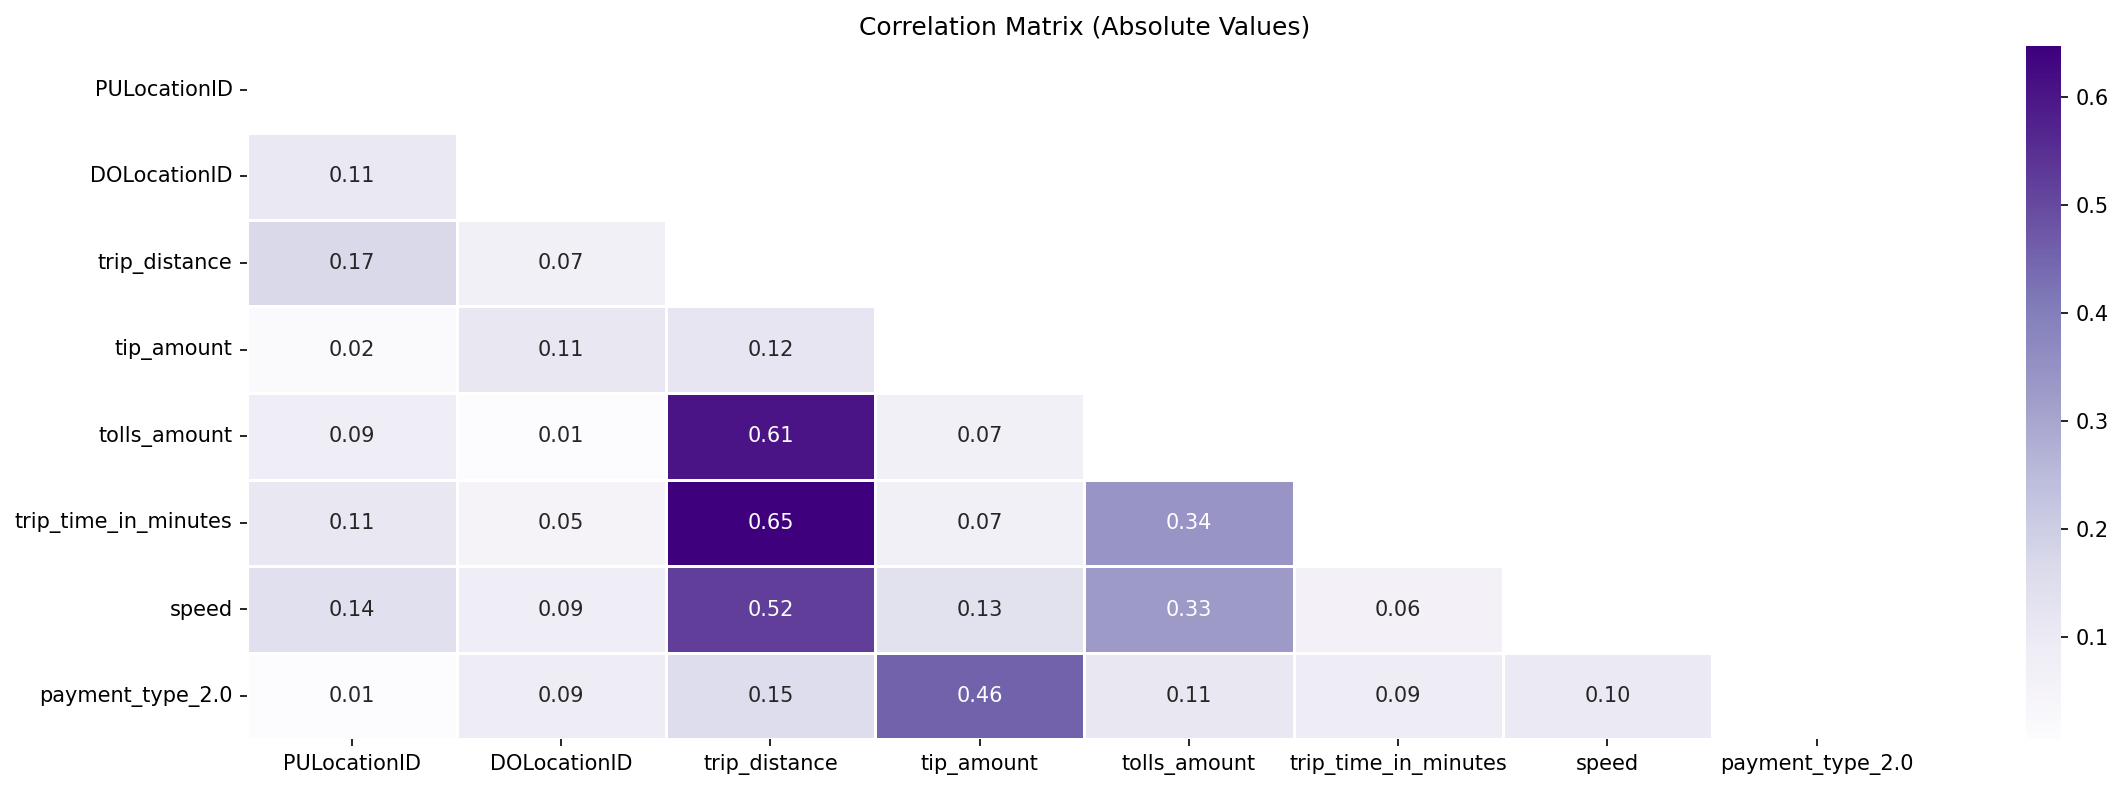

In [58]:
# Get the correlation values with 'total_amount'
corr_with_total_amount = corr_matrix['total_amount']

# Filter out columns with correlation less than 0.05
columns_to_drop = corr_with_total_amount[
    corr_with_total_amount < 0.1].index

df_regression = df_dropped.drop(columns=columns_to_drop)

# Calculate the correlation matrix and take absolute values
df_regression_corr = df_regression.drop(columns=["total_amount"]).corr().abs()
mask = np.triu(np.ones_like(df_regression_corr, dtype=bool))

plt.figure(figsize=(18, 6), dpi=150)
plt.title('Correlation Matrix (Absolute Values)')
sns.heatmap(df_regression_corr, mask=mask, annot=True, cmap='Purples',
            linewidths=0.5, fmt='.2f')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                With a threshold of 0.7 (considering correlation above 0.7 as high correlation), there is no need to remove any column because of collinearity.
        </font>
</div>

In [59]:
# Backward Elimination Method:
def backward_feature_selection(data, target_column='total_amount', n_features=8):
    X = data.drop(columns=[target_column])
    y = data[target_column]

    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X, y)

    selected_features = X.columns[rfe.support_]
    return list(selected_features)


# Create a copy to prevent conflicts
df_selection = df_dropped.copy()
backward_selected_features = backward_feature_selection(
    df_selection, target_column='total_amount', n_features=8)
print("Selected Features:", backward_selected_features)

Selected Features: ['trip_distance', 'tip_amount', 'tolls_amount', 'trip_type', 'speed', 'payment_type_3.0', 'payment_type_4.0', 'payment_type_5.0']


In [60]:
# Forward Selection Method:
def forward_feature_selection(data, target_column='total_amount', n_features=8):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    model = LinearRegression()

    selected_features = []
    remaining_features = list(X.columns)

    while len(selected_features) < n_features and remaining_features:
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            trial_features = selected_features + [feature]
            scores = cross_val_score(
                model, X[trial_features], y, cv=5, scoring='r2')
            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_score = mean_score
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
    return selected_features


# Create a copy to prevent conflicts
df_selection = df_dropped.copy()
forward_selected_features = forward_feature_selection(
    df_selection, target_column='total_amount', n_features=8)
print("Selected features:", forward_selected_features)

Selected features: ['trip_distance', 'tip_amount', 'trip_time_in_minutes', 'tolls_amount', 'speed', 'DOLocationID', 'payment_type_3.0', 'VendorID']


In [61]:
# Chi-squared Feature Selection:
def chi_square_feature_selection(data, target_column='total_amount', n_features=8):

    if data[target_column].dtype not in ['int64', 'int32', 'bool', 'uint8']:
        data[target_column] = pd.qcut(data[target_column], q=4, labels=False)

    X = data.drop(columns=[target_column])
    y = data[target_column]

    for column in X.columns:
        if X[column].dtype in ['float64', 'int64']:
            X[column] = pd.cut(X[column], bins=5, labels=False)
        X[column] = X[column].clip(lower=0)

    chi_selector = SelectKBest(score_func=chi2, k=n_features)
    X_kbest = chi_selector.fit_transform(X, y)

    selected_features = X.columns[chi_selector.get_support()]
    return selected_features


# Create a copy to prevent conflicts
df_selection = df_dropped.copy()
chi_selected_features = chi_square_feature_selection(
    df_selection, target_column='total_amount', n_features=8)
print("Selected Features:", chi_selected_features)

Selected Features: Index(['PULocationID', 'DOLocationID', 'trip_distance', 'tolls_amount',
       'trip_time_in_minutes', 'hour', 'month', 'payment_type_2.0'],
      dtype='object')


In [62]:
# Random Forest Feature Selection:
def random_forest_feature_selection(data, target_column='total_amount', n_features=8):
    X = data.drop(columns=[target_column])
    y = data[target_column]

    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)

    feature_importances = pd.Series(
        model.feature_importances_, index=X.columns)

    selected_features = feature_importances.nlargest(n_features).index.tolist()
    return selected_features


# Create a copy to prevent conflicts
df_selection = df_dropped.copy()
rf_selected_features = random_forest_feature_selection(
    df_selection, target_column='total_amount', n_features=8)
print("Selected Features:", rf_selected_features)

Selected Features: ['trip_distance', 'trip_time_in_minutes', 'tip_amount', 'trip_type', 'tolls_amount', 'VendorID', 'DOLocationID', 'speed']


In [63]:
# Function to calculate R^2 for a given set of features
def evaluate_r2(data, target_column, selected_features):

    X = data[selected_features]
    y = data[target_column]

    model = LinearRegression()

    scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    return np.mean(scores)


backward_r2 = evaluate_r2(df_dropped, 'total_amount',
                          backward_selected_features)

forward_r2 = evaluate_r2(df_dropped, 'total_amount', forward_selected_features)

chi_r2 = evaluate_r2(df_dropped, 'total_amount', chi_selected_features)

rf_r2 = evaluate_r2(df_dropped, 'total_amount', rf_selected_features)

print("R^2 for Backward Selection:", backward_r2)
print("R^2 for Forward Selection:", forward_r2)
print("R^2 for Chi-Square Selection:", chi_r2)
print("R^2 for Random Forest Selection:", rf_r2)

# Determine the best method based on the highest R^2 score
best_method = max(
    [('Backward', backward_r2),
     ('Forward', forward_r2),
     ('Chi-Square', chi_r2),
     ('Random Forest', rf_r2)],
    key=lambda x: x[1]
)
# Print the best method and its R^2 score
print("Best method is:", best_method[0], "with R^2:", best_method[1])

R^2 for Backward Selection: 0.8949352432050942
R^2 for Forward Selection: 0.9104500164543678
R^2 for Chi-Square Selection: 0.8806992292730055
R^2 for Random Forest Selection: 0.9101001431531597
Best method is: Forward with R^2: 0.9104500164543678


<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
            Considering the results, based on the R² score (note that the adjusted R² is approximately equal to the regular R² due to the large N in the formula), the best method is <i>forward selection</i> with a score of 0.91045.
        </font>
</div>

<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Classification of <i>trip_payment</i>
        </font>
        <p></p>
        <hr />
        Classify whether the <i>trip_payment</i> has been paid or not.
        <br />
    </font>
</div>


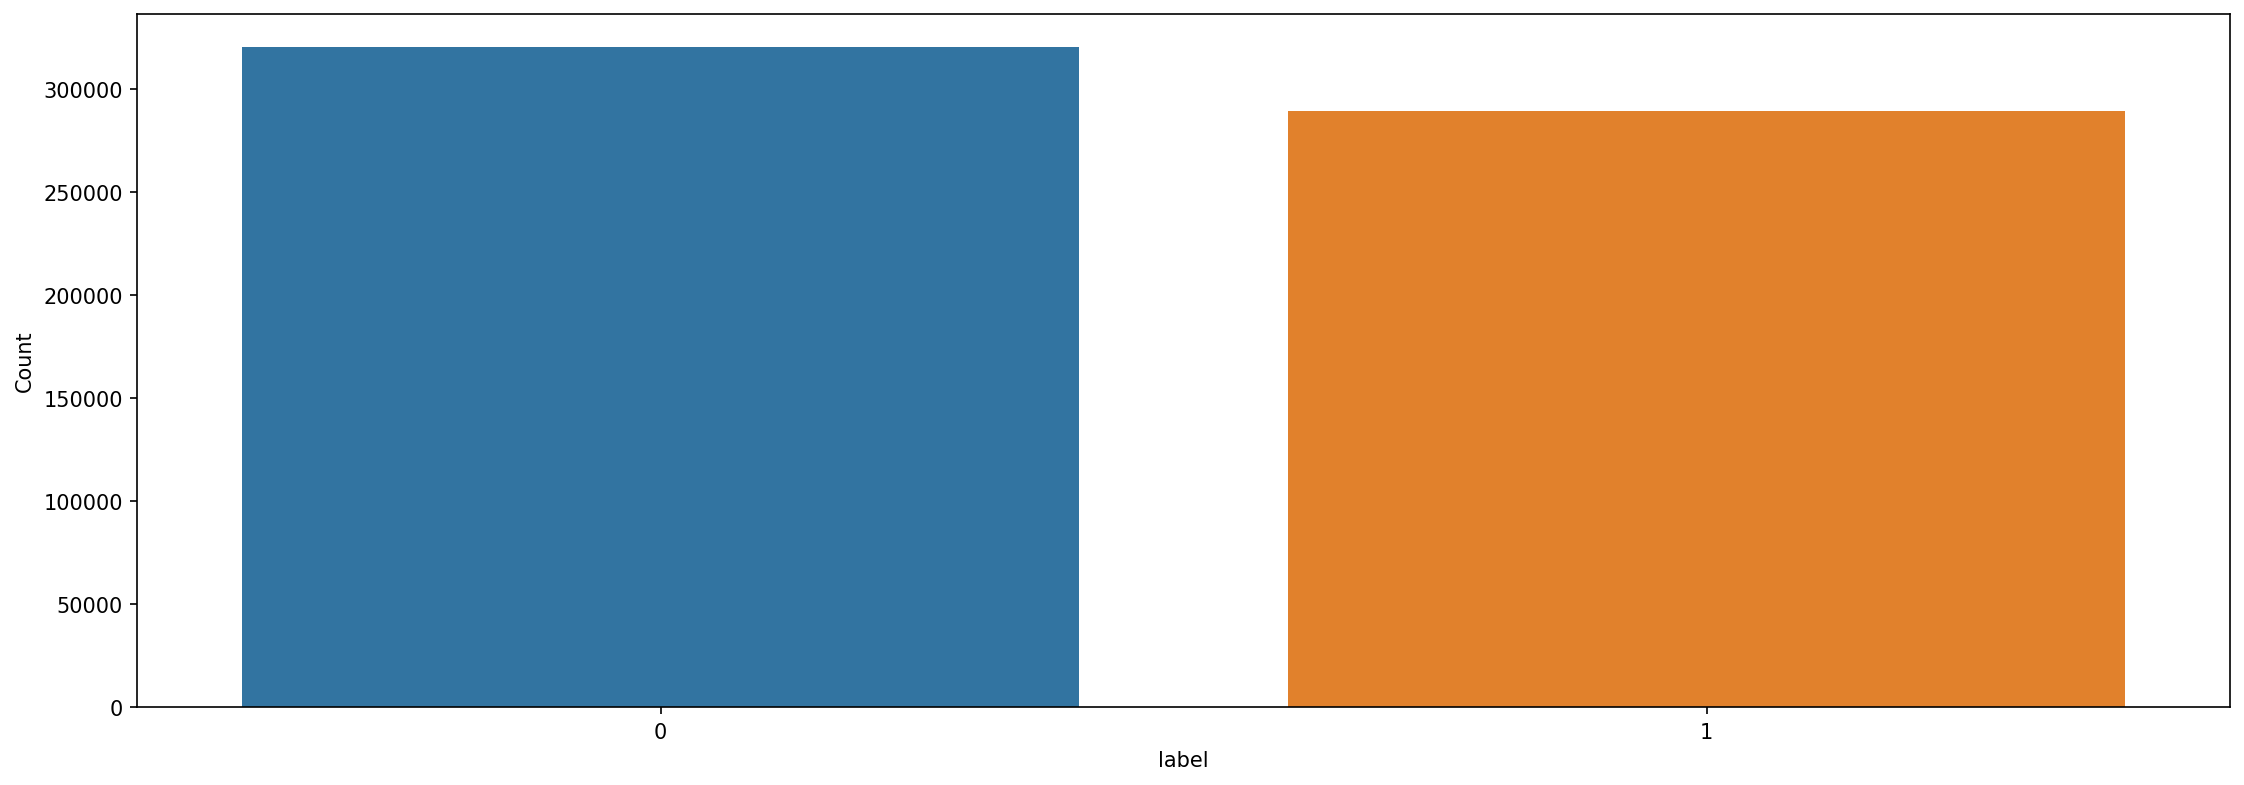

In [64]:
# Check if the target column is balanced or not.
df_dropped["label"] = df_dropped["tip_amount"].apply(
    lambda x: 1 if x > 0 else 0)
plot(df_dropped, "label")

In [65]:
# Drop the unnecessary columns for predicting that if the tip is payed or not.
X = df_dropped.drop(columns=['tip_amount', 'label', 'VendorID',
                             'PULocationID', 'DOLocationID'])
y = df_dropped['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.15],
    'subsample': [0.6, 8.0, 1.0],
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss', objective='binary:logistic', n_estimators=100, colsample_bytree=0.8, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of XGBoost with hyperparameter tuning: {accuracy:.4f}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'learning_rate': 0.15, 'max_depth': 9, 'subsample': 1.0}
Accuracy of XGBoost with hyperparameter tuning: 0.9734


<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        Using 3-fold cross-validation with 27 combinations of hyperparameters, we achieved the above result based on accuracy. However, if we change the evaluation metric, we might find a different set of optimal hyperparameters.<br />
        <ul>
            <li><b>Subsample (1.0):</b> It refers to the fraction of training data the model can use for each tree. A subsample value of 1 suggests that the model can capture higher complexity in the data (lower bias & higher variance). It also increases the risk of overfitting (high variance), but since we are using cross-validation and have a large dataset, overfitting is not a concern in this case.</li>
            <li><b>Max Depth (9):</b> This refers to how much a tree can grow. A max depth of 9 suggests that the model can split data at multiple levels and capture more complexity (lower bias & higher variance). As mentioned, with cross-validation and a large dataset, overfitting would not be a concern.</li>
            <li><b>Learning Rate (0.15):</b> This controls the gradual step of updating the weights during training. A learning rate of 0.15 can be considered a relatively high learning rate.</li>
        </ul>
    </font>
</div>


In [66]:
def evaluate_model(learning_rate, max_depth, subsample):
    max_depth = int(max_depth)
    xgb_model = xgb.XGBClassifier(eval_metric='logloss', objective='binary:logistic', learning_rate=learning_rate,
                                  subsample=subsample, n_estimators=100, colsample_bytree=0.8, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    y_prob = xgb_model.predict_proba(X_test)[:, 1]  # For AUC-ROC and log_loss

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    logloss = log_loss(y_test, y_prob)

    return accuracy, f1, precision, recall, auc_roc, logloss


learning_rate_values = [0.01, 0.1, 0.15]
max_depth_values = [3, 6, 9]
subsample_values = [0.8, 0.9, 1.0]

# Orthogonal Array design - L9 array (3^3 design for 3 factors)
orthogonal_array = np.array([
    [0.01, 3, 0.8],
    [0.01, 6, 0.9],
    [0.01, 9, 1.0],
    [0.1, 3, 0.9],
    [0.1, 6, 1.0],
    [0.1, 9, 0.8],
    [0.15, 3, 1.0],
    [0.15, 6, 0.8],
    [0.15, 9, 0.9]
])


results = []
for i in range(orthogonal_array.shape[0]):
    learning_rate, max_depth, subsample = orthogonal_array[i]

    accuracy, f1, precision, recall, auc_roc, logloss = evaluate_model(
        learning_rate, max_depth, subsample)

    # Append the result to the list
    results.append((learning_rate, max_depth, subsample,
                   accuracy, f1, precision, recall, auc_roc, logloss))

    # Print the results with appropriate metrics
    print(f"Experiment {i+1}: Learning Rate = {learning_rate}, Max Depth = {max_depth}, Subsample = {subsample} => "
          f"Accuracy = {accuracy:.3f}, F1 = {f1:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, "
          f"AUC-ROC = {auc_roc:.3f}, Log Loss = {logloss:.5f}")

# Choose the best result based on logloss or another metric
best_result = min(results, key=lambda x: x[-1])
print(f"\nBest result: Learning Rate = {best_result[0]}, Max Depth = {best_result[1]}, Subsample = {best_result[2]} => "
      f"Accuracy = {best_result[3]:.3f}, F1 = {best_result[4]:.3f}, Precision = {best_result[5]:.3f}, "
      f"Recall = {best_result[6]:.3f}, AUC-ROC = {best_result[7]:.3f}, Log Loss = {best_result[8]:.5f}")

Experiment 1: Learning Rate = 0.01, Max Depth = 3.0, Subsample = 0.8 => Accuracy = 0.921, F1 = 0.922, Precision = 0.876, Recall = 0.974, AUC-ROC = 0.978, Log Loss = 0.36042
Experiment 2: Learning Rate = 0.01, Max Depth = 6.0, Subsample = 0.9 => Accuracy = 0.921, F1 = 0.922, Precision = 0.875, Recall = 0.974, AUC-ROC = 0.977, Log Loss = 0.36051
Experiment 3: Learning Rate = 0.01, Max Depth = 9.0, Subsample = 1.0 => Accuracy = 0.921, F1 = 0.922, Precision = 0.876, Recall = 0.973, AUC-ROC = 0.978, Log Loss = 0.36017
Experiment 4: Learning Rate = 0.1, Max Depth = 3.0, Subsample = 0.9 => Accuracy = 0.961, F1 = 0.960, Precision = 0.946, Recall = 0.974, AUC-ROC = 0.992, Log Loss = 0.11797
Experiment 5: Learning Rate = 0.1, Max Depth = 6.0, Subsample = 1.0 => Accuracy = 0.961, F1 = 0.960, Precision = 0.946, Recall = 0.974, AUC-ROC = 0.992, Log Loss = 0.11794
Experiment 6: Learning Rate = 0.1, Max Depth = 9.0, Subsample = 0.8 => Accuracy = 0.960, F1 = 0.959, Precision = 0.945, Recall = 0.974, A

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <p><b>Experiment 9 (Learning Rate = 0.15, Max Depth = 9, Subsample = 0.9)</b> provides the best performance when evaluated by <b>log loss</b>:</p>
        <ul>
            <li><b>Log Loss:</b> 0.10008 — This is the lowest log loss value, indicating the most accurate probabilistic predictions.</li>
            <li><b>Accuracy:</b> 96.8% — A high accuracy score, confirming the model’s ability to classify most instances correctly.</li>
            <li><b>F1 Score:</b> 0.966 — A good balance between precision and recall, indicating that the model is both accurate and consistent.</li>
            <li><b>Precision:</b> 0.959 — The model performs well in identifying positive cases, minimizing false positives.</li>
            <li><b>Recall:</b> 0.974 — The model is highly sensitive to positive cases, minimizing false negatives.</li>
            <li><b>AUC-ROC:</b> 0.994 — A near-perfect score, showing the model’s strong ability to distinguish between the positive and negative classes.</li>
        </ul>
    </font>
</div>


In [67]:
# Drop the unnecessary columns for predicting that if the tip is payed or not.
X = df_dropped.drop(columns=['tip_amount', 'label',
                             'PULocationID', 'DOLocationID', 'VendorID'])
y = df_dropped['label']

# Randomly sample 10% of the entire dataset
X_sampled, _, y_sampled, _ = train_test_split(
    X, y, test_size=0.9, random_state=42)

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, shuffle=True)

# Define the parameter grid for Random Forest
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest with hyperparameter tuning: {accuracy:.4f}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Random Forest with hyperparameter tuning: 0.9532


<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        Using 3-fold cross-validation with 27 combinations of hyperparameters, we achieved the above results based on accuracy. However, if we change the evaluation metric, we might find a different set of optimal hyperparameters.<br />
        <p><b>Best Model Parameters:</b> {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}</p>
        <p><b>Accuracy of Random Forest with hyperparameter tuning:</b> 95.32%</p>
        <ul>
            <li><b>Max Depth (None):</b> Allowing the tree to grow without a depth limit means the model can capture complex patterns (lower bias and higher variance) in the data without pruning. However, this also increases the risk of overfitting, especially with small datasets. In this case, the model performed well, suggesting it is not overfitting due to the cross-validation and large dataset.</li>
            <li><b>Min Samples Split (2):</b> This means the model will attempt to split a node if there are at least 2 samples in the node. This value is quite low and suggests the model is capable of making splits even with the smallest subsets of data (with max depth of 9, it indicate higher variance and lower bias).</li>
            <li><b>Min Samples Leaf (1):</b> A minimum of 1 sample per leaf means the tree will grow as large as needed to fit the data, allowing the tree to create fine-grained decision boundaries. This is a very flexible setting but can also lead to overfitting (lower bias and higher variance) in some cases.</li>
        </ul>
    </font>
</div>


In [68]:
def evaluate_model(max_depth, min_samples_split, min_samples_leaf):
    max_depth = int(max_depth)

    # Initialize the RandomForestClassifier with given parameters
    rf_model = RandomForestClassifier(n_estimators=100,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      max_depth=max_depth,
                                      random_state=42)

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions and probabilities
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]  # For AUC-ROC and log_loss

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    logloss = log_loss(y_test, y_prob)

    return accuracy, f1, precision, recall, auc_roc, logloss


# Define the values for hyperparameters (Orthogonal Array design)
min_samples_split_values = [2, 5, 10]
max_depth_values = [None, 10, 20]
min_samples_leaf_values = [1, 2, 4]

# Orthogonal Array design - L9 array (3^3 design for 3 factors)
orthogonal_array = np.array([
    [2, 10, 1],
    [5, 10, 2],
    [10, 10, 4],
    [2, 20, 2],
    [5, 20, 4],
    [10, 20, 1],
    [2, 30, 4],
    [5, 30, 1],
    [10, 30, 2]
])

# Initialize an empty list to store the results
results = []

# Perform the experiments using the Orthogonal Array design
for i in range(orthogonal_array.shape[0]):
    min_samples_split, max_depth, min_samples_leaf = orthogonal_array[i]

    # Evaluate the model with the current hyperparameters
    accuracy, f1, precision, recall, auc_roc, logloss = evaluate_model(
        max_depth, min_samples_split, min_samples_leaf)

    # Store the results
    results.append((min_samples_split, max_depth, min_samples_leaf,
                   accuracy, f1, precision, recall, auc_roc, logloss))

    # Print the results
    print(f"Experiment {i+1}: Min Samples Split = {min_samples_split}, Max Depth = {max_depth}, Min Samples Leaf = {min_samples_leaf} => "
          f"Accuracy = {accuracy:.3f}, F1 = {f1:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, "
          f"AUC-ROC = {auc_roc:.3f}, Log Loss = {logloss:.5f}")

# Choose the best result based on log loss (or another metric)
best_result = min(results, key=lambda x: x[-1])  # Minimize log loss
print(f"\nBest result: Min Samples Split = {best_result[0]}, Max Depth = {best_result[1]}, Min Samples Leaf = {best_result[2]} => "
      f"Accuracy = {best_result[3]:.3f}, F1 = {best_result[4]:.3f}, Precision = {best_result[5]:.3f}, "
      f"Recall = {best_result[6]:.3f}, AUC-ROC = {best_result[7]:.3f}, Log Loss = {best_result[8]:.5f}")

Experiment 1: Min Samples Split = 2, Max Depth = 10, Min Samples Leaf = 1 => Accuracy = 0.923, F1 = 0.924, Precision = 0.874, Recall = 0.979, AUC-ROC = 0.974, Log Loss = 0.20719
Experiment 2: Min Samples Split = 5, Max Depth = 10, Min Samples Leaf = 2 => Accuracy = 0.922, F1 = 0.922, Precision = 0.873, Recall = 0.978, AUC-ROC = 0.976, Log Loss = 0.20880
Experiment 3: Min Samples Split = 10, Max Depth = 10, Min Samples Leaf = 4 => Accuracy = 0.924, F1 = 0.924, Precision = 0.876, Recall = 0.979, AUC-ROC = 0.978, Log Loss = 0.20755
Experiment 4: Min Samples Split = 2, Max Depth = 20, Min Samples Leaf = 2 => Accuracy = 0.946, F1 = 0.945, Precision = 0.916, Recall = 0.976, AUC-ROC = 0.990, Log Loss = 0.13944
Experiment 5: Min Samples Split = 5, Max Depth = 20, Min Samples Leaf = 4 => Accuracy = 0.943, F1 = 0.943, Precision = 0.911, Recall = 0.977, AUC-ROC = 0.989, Log Loss = 0.14646
Experiment 6: Min Samples Split = 10, Max Depth = 20, Min Samples Leaf = 1 => Accuracy = 0.946, F1 = 0.945, P

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <p><b>Best Model Parameters:</b> {'Min Samples Split': 5, 'Max Depth': 30, 'Min Samples Leaf': 1}</p>
        <p><b>Log Loss of Best Model:</b> 0.12693 — This is the lowest log loss value, indicating the most accurate probabilistic predictions.</p>
        <p><b>Other Metrics of Best Model:</b></p>
        <ul>
            <li><b>Log Loss:</b> 0.12693 — This is the lowest log loss value, indicating the most accurate probabilistic predictions.</li>
            <li><b>Accuracy:</b> 95.3% — A high accuracy score, confirming the model’s ability to classify most instances correctly.</li>
            <li><b>F1 Score:</b> 0.951 — A good balance between precision and recall, indicating that the model is both accurate and consistent.</li>
            <li><b>Precision:</b> 0.932 — The model performs well in identifying positive cases, minimizing false positives.</li>
            <li><b>Recall:</b> 0.972 — The model is highly sensitive to positive cases, minimizing false negatives.</li>
            <li><b>AUC-ROC:</b> 0.992 — A near-perfect score, showing the model’s strong ability to distinguish between the positive and negative classes.</li>
        </ul>
    </font>
</div>


<p></p>
<br />
<div id="sec_intro_to_intro" style="direction:ltr; line-height:300%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
            Predicting the Continuous Value of <i>total_amount</i>
        </font>
        <p></p>
        <hr />
        Predicting the total amount that has been paid.
        <br />
    </font>
</div>


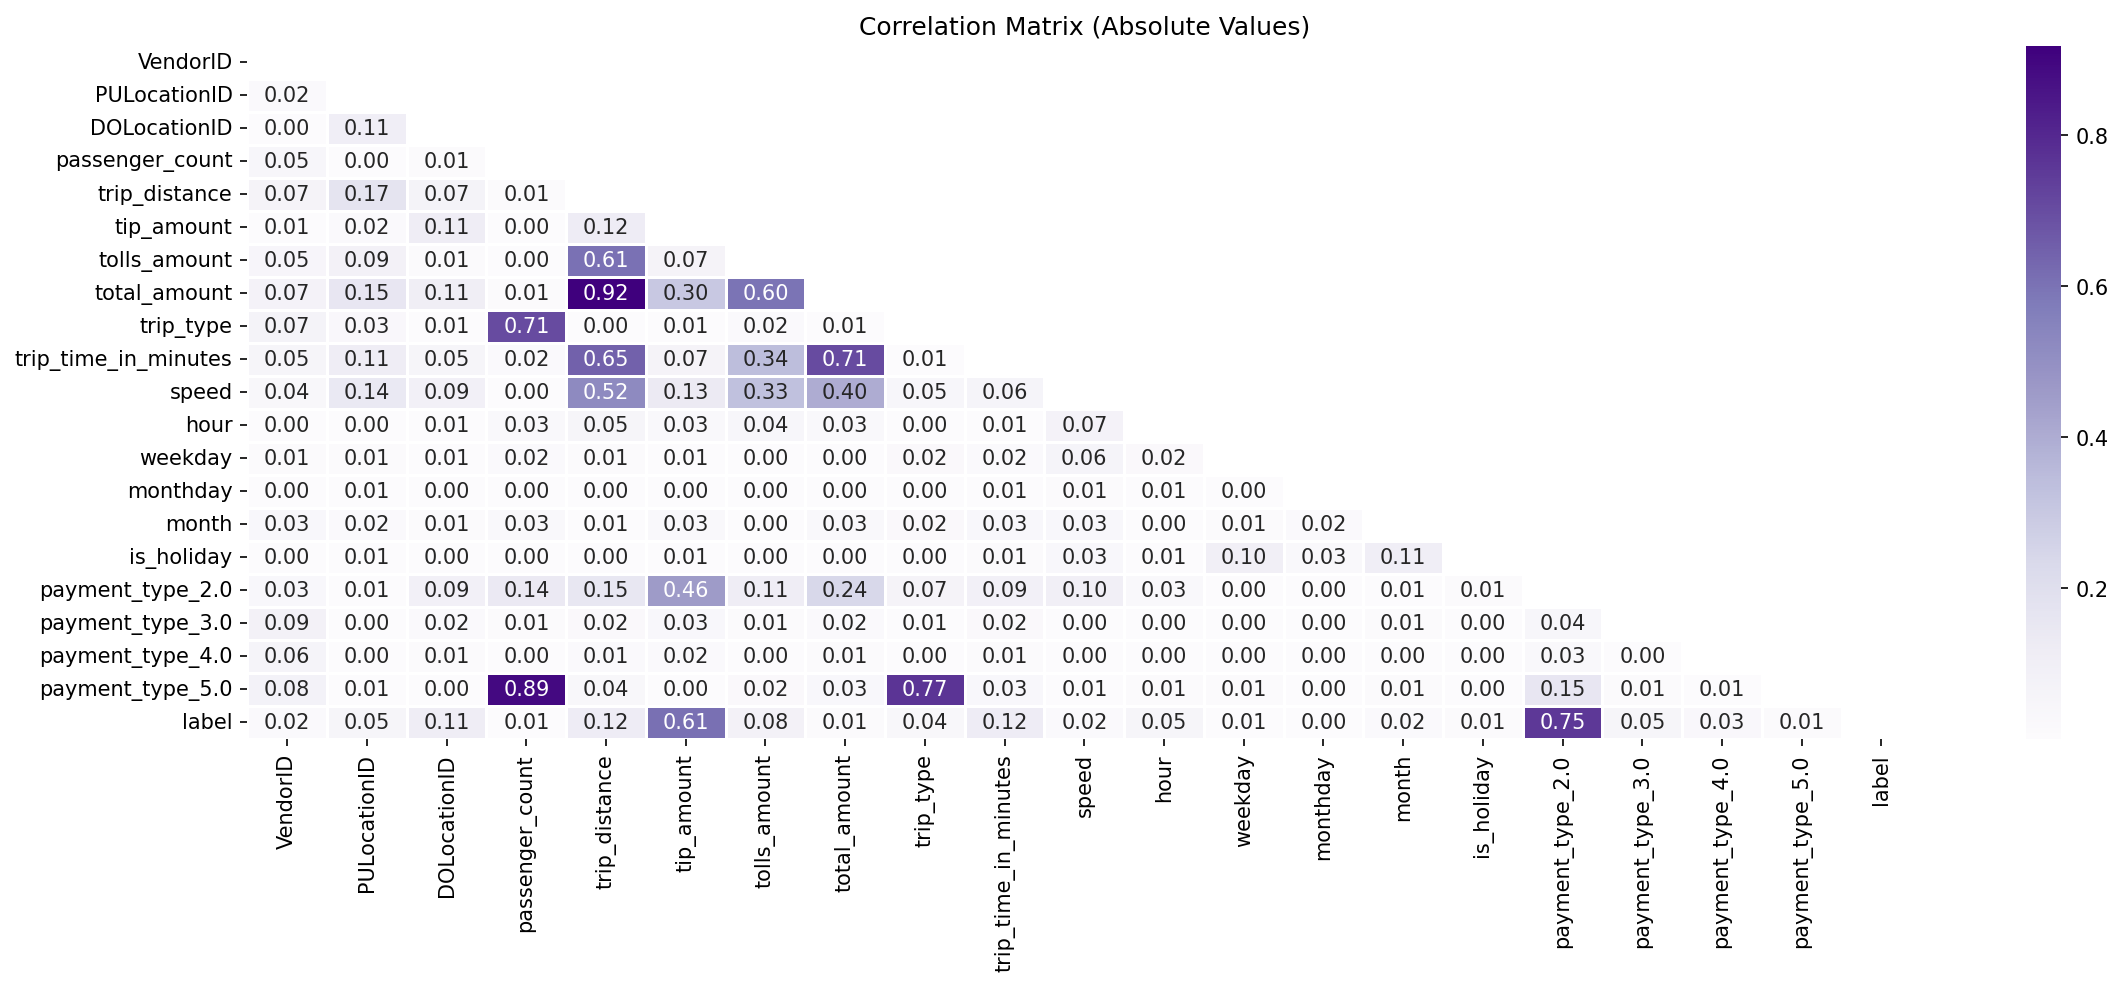

In [69]:
corr_matrix = df_dropped.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 6), dpi=150)
plt.title('Correlation Matrix (Absolute Values)')
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Purples',
            linewidths=0.5, fmt='.2f')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltl;line-height:200%;">
	<font face="XB Zar" size=4>
                We will filter the correlations below 0.1 out. 
        </font>
</div>

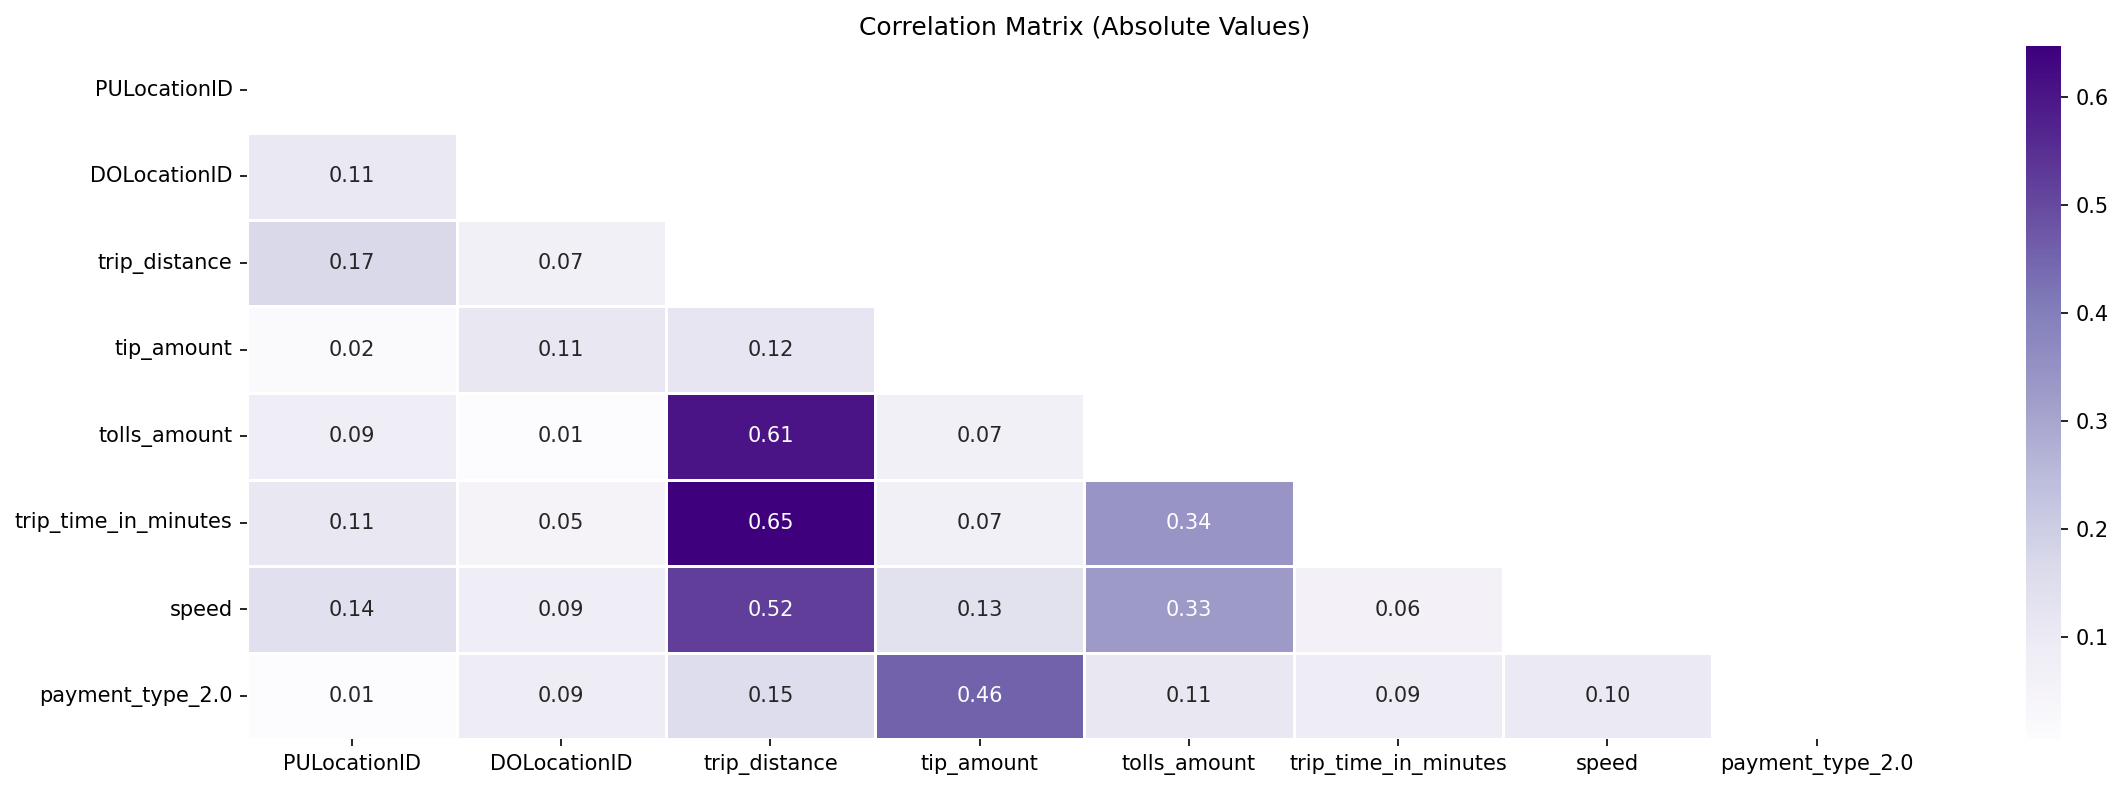

In [70]:
# Get the correlation values with 'total_amount'
corr_with_total_amount = corr_matrix['total_amount']

# Filter out columns with correlation less than 0.05
columns_to_drop = corr_with_total_amount[
    corr_with_total_amount < 0.1].index

df_regression = df_dropped.drop(columns=columns_to_drop)

# Calculate the correlation matrix and take absolute values
df_regression_corr = df_regression.drop(columns=["total_amount"]).corr().abs()
mask = np.triu(np.ones_like(df_regression_corr, dtype=bool))

plt.figure(figsize=(18, 6), dpi=150)
plt.title('Correlation Matrix (Absolute Values)')
sns.heatmap(df_regression_corr, mask=mask, annot=True, cmap='Purples',
            linewidths=0.5, fmt='.2f')
plt.show()

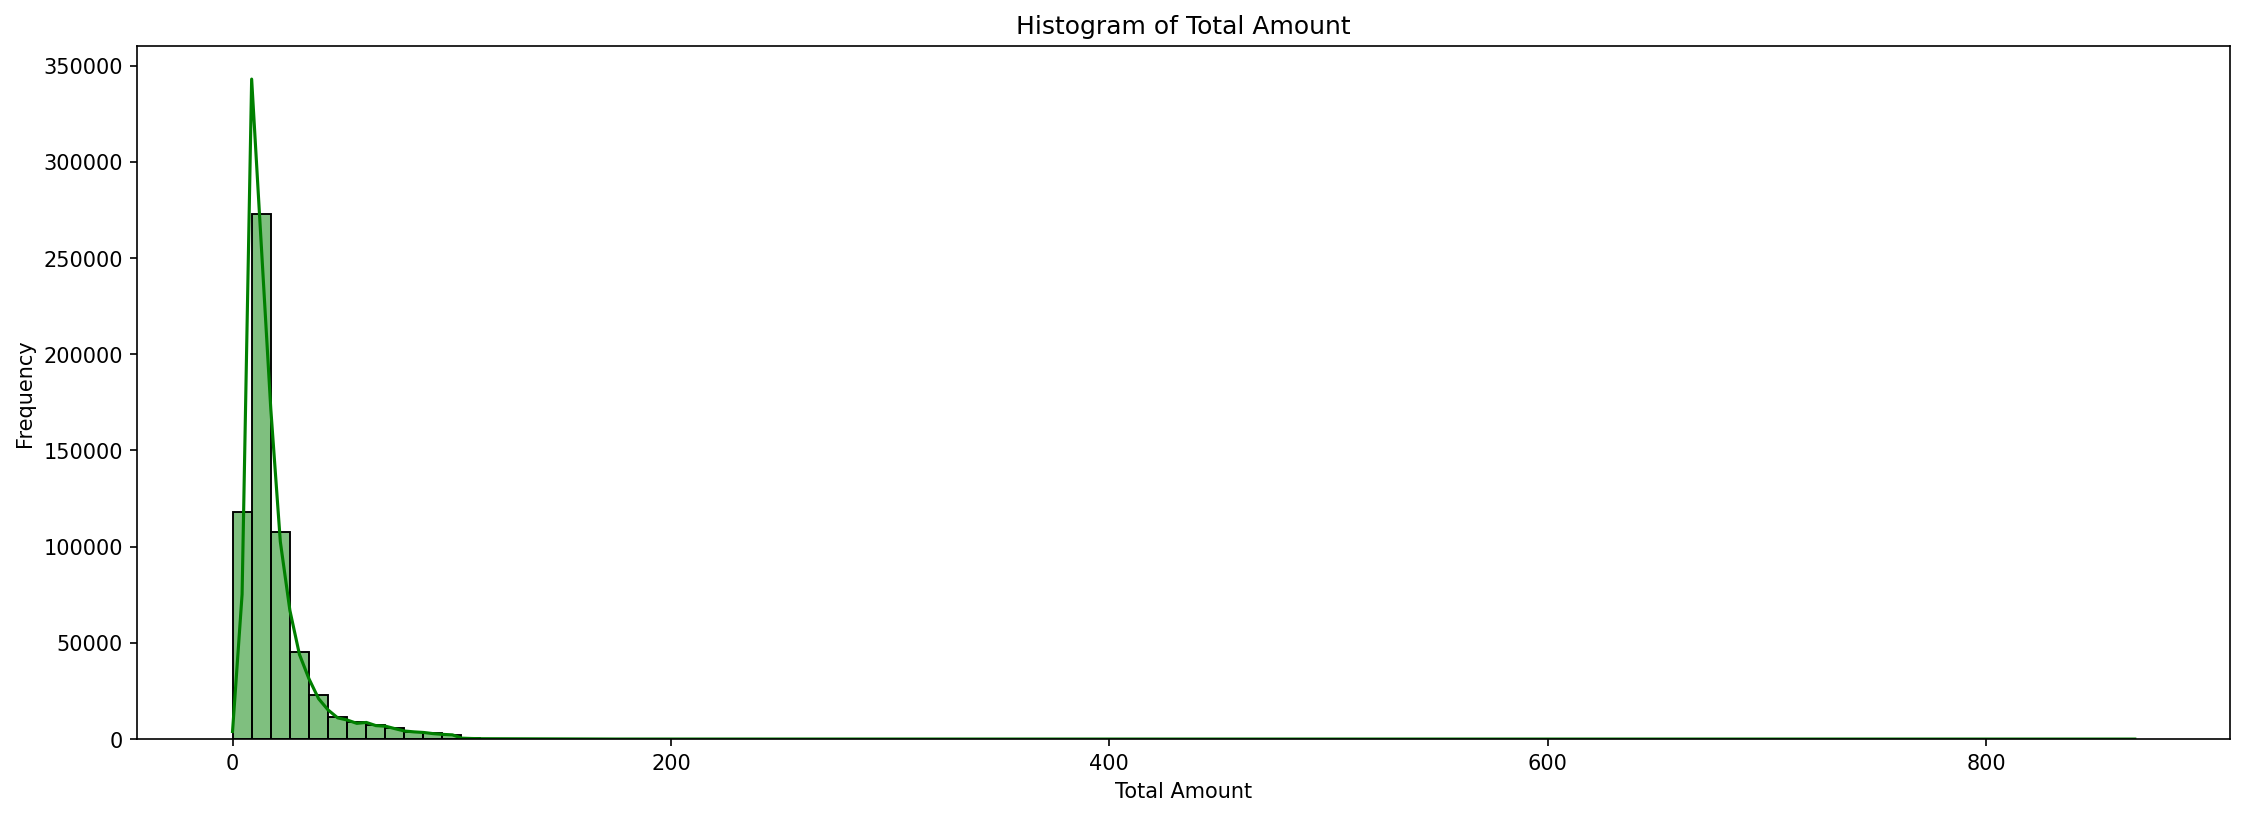

In [71]:
# Plot the histogram
plt.figure(figsize=(18, 6), dpi=150)
sns.histplot(df_regression["total_amount"], kde=True, bins=100, color='green')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Total Amount')
plt.show()

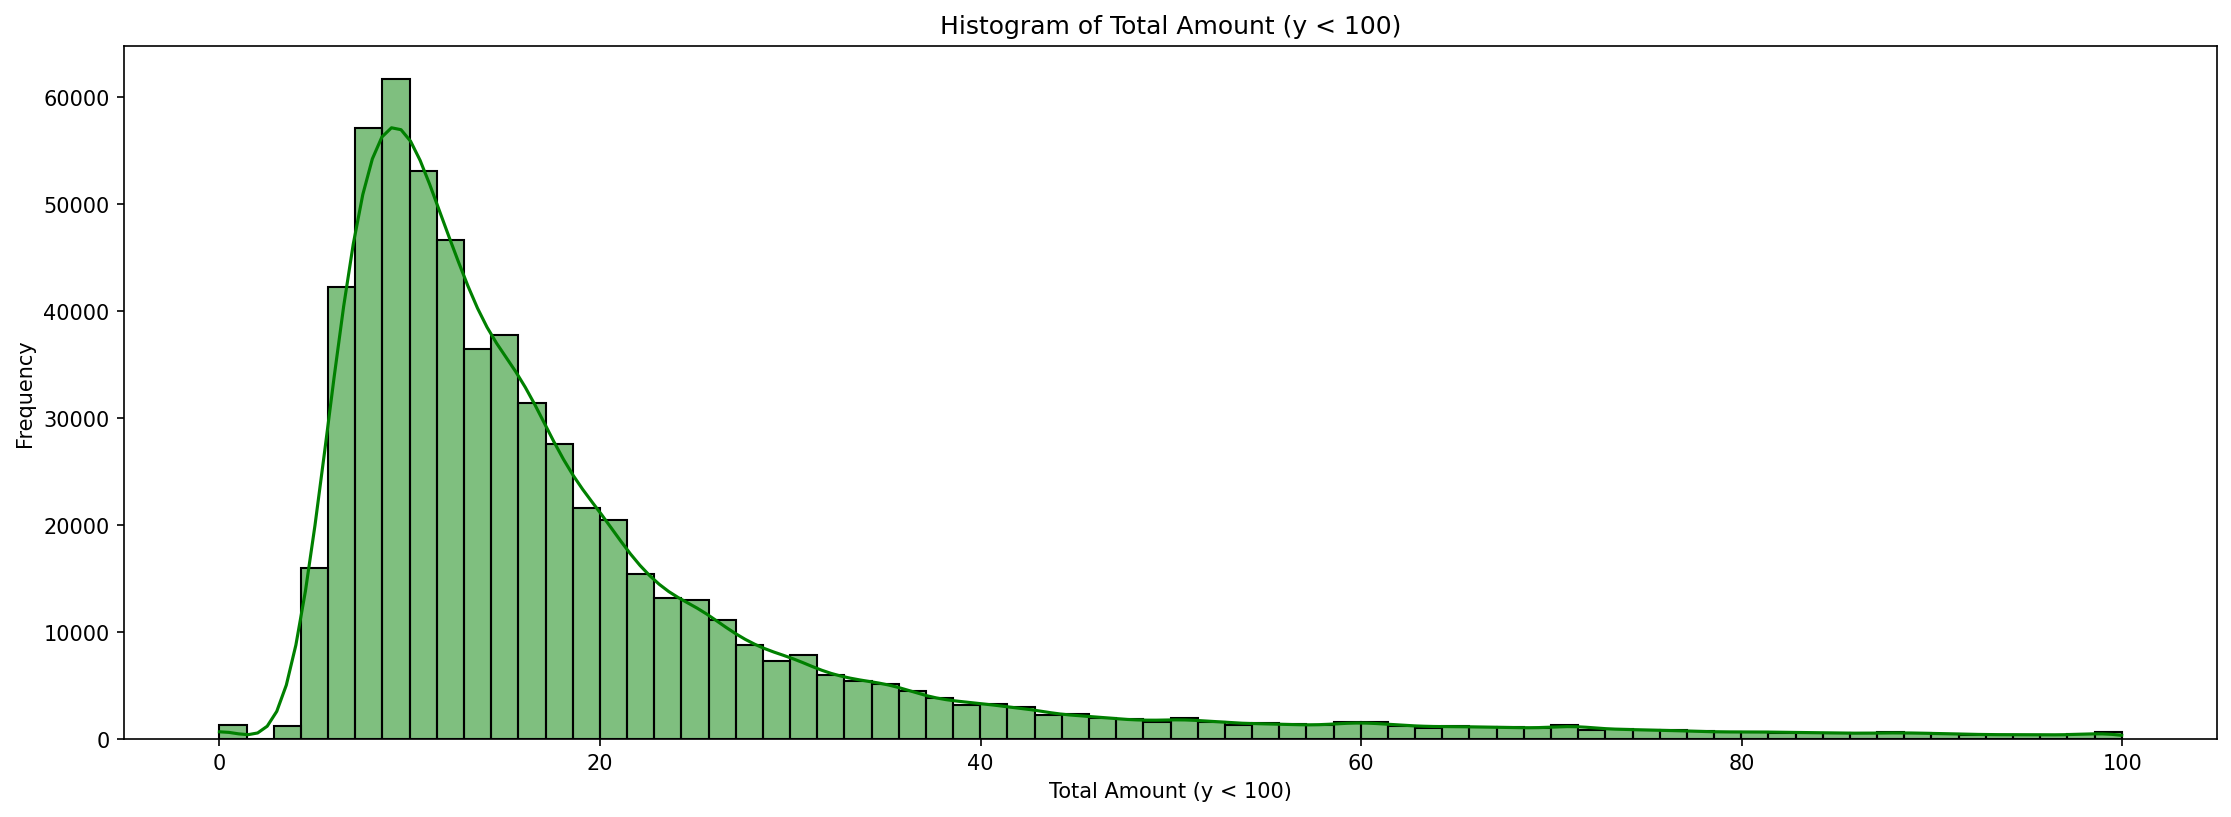

In [72]:
# Filter y values less than 200
df_regression_filtered = df_regression[df_regression["total_amount"] < 100]

# Plot the histogram
plt.figure(figsize=(18, 6), dpi=150)
sns.histplot(df_regression_filtered["total_amount"], kde=True, bins=70, color='green')
plt.xlabel('Total Amount (y < 100)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Amount (y < 100)')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        We removed rows with large <i>total amount</i> values. In linear regression, when using the MSE function as the cost function, it is beneficial to remove large outliers due to the significant penalty that large values impose on the model. </br>
        Due to using L2 regularization, here is some eplanation:
    </font>
</div>


## Ridge Regression (L2 Regularization):

The objective function for Ridge regression is as follows:

$$
\underset{\beta}{\text{minimize}} \ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \mathbf{x}_i^T \boldsymbol{\beta} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Here:
- $ y_i $ is the actual value of the target variable.
- $ \mathbf{x}_i $ is the vector of features for the $ i $-th sample.
- $ \boldsymbol{\beta} $ represents the vector of coefficients.
- $ \lambda $ is the regularization parameter that controls the strength of the L1 penalty.
- The $ \sum_{j=1}^{p} \beta_j^2 $ term imposes L2 regularization, penalizing large coefficients and shrinking them towards zero, but without forcing them to become exactly zero.

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1000}
Mean Squared Error: 18.0874
R² Score: 0.92251170
Adjusted R²: 0.92250661


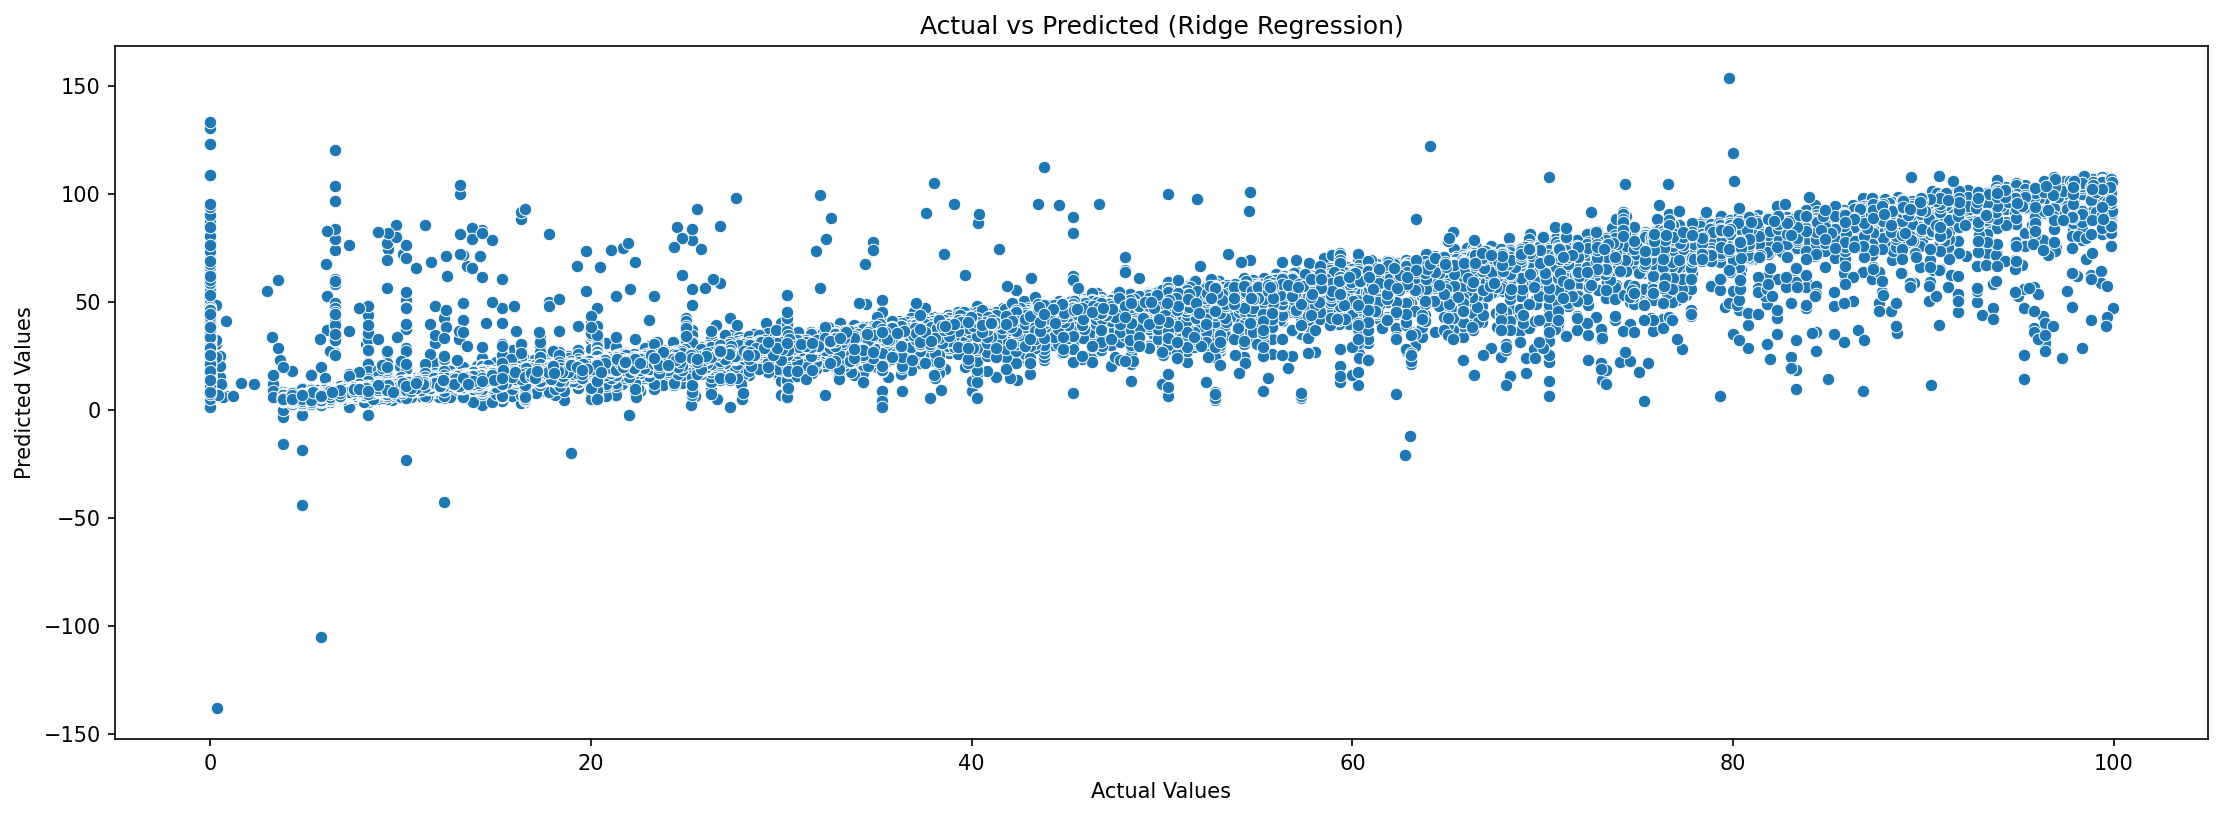

In [73]:
columns_to_drop = ["total_amount"]

# Prepare the features (X) and target (y)
X = df_regression_filtered.drop(columns=columns_to_drop)
y = df_regression_filtered['total_amount']
scaler = StandardScaler()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000],  # Maximum iterations for convergence
}

# Initialize the Ridge regression model
ridge_model = Ridge()

# Set up GridSearchCV with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           scoring='r2', cv=3, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Get the best model from GridSearchCV
best_ridge_model = grid_search.best_estimator_
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features (predictors)

# Calculate Adjusted R²
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.8f}")
print(f"Adjusted R²: {r2_adj:.8f}")

# Optionally, visualize the actual vs predicted values
plt.figure(figsize=(18, 6), dpi=150)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        <font color="crimson" size="6">
        </font>
        <p></p>
        <hr />
        After performing 3-fold cross-validation with 12 hyperparameter combinations, totalling 36 fits, the best hyperparameters found were:
        <ul>
            <li><b>Alpha:</b> 10 (Controls the strength of L2 regularization)</li>
            <li><b>Fit Intercept:</b> True (Model includes an intercept term)</li>
            <li><b>Max Iterations:</b> 1000 (The maximum number of iterations for convergence)</li>
        </ul>
        <br />
        Model evaluation metrics:
        <ul>
            <li><b>Mean Squared Error (MSE):</b> 18.0874 - The model's average squared error on predictions, indicating a moderate error rate.</li>
            <li><b>R² Score:</b> 0.9225 - The proportion of variance explained by the model; this value suggests that the model explains about 92.25% of the variability in the target variable, which is a good one.</li>
            <li><b>Adjusted R²:</b> 0.9225 - This metric adjusts for the number of predictors, preventing the model from being biased by the inclusion of more variables. But in our case, due to large number of observations, Adjusted R² approximately is equal to the regular R²</li>
        </ul>
    </font>
</div>


In [74]:
X = df_dropped.drop(columns=['total_amount', 'label', 'VendorID',
                             'PULocationID', 'DOLocationID'])
y = df_dropped['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.15],
    'subsample': [0.6, 0.8, 1.0],
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    eval_metric='rmse',
    objective='reg:squarederror',  # Use squared error loss for regression
    n_estimators=100,  # Number of boosting rounds
    random_state=42,  # For reproducibility
    colsample_bytree=0.8
)

# Initialize GridSearchCV for regression
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model using MAE, MSE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features (predictors)
r2_adj = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.8f}')
print(f'Adjusted R-squared (R²_adj): {r2_adj:.8f}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'learning_rate': 0.15, 'max_depth': 9, 'subsample': 1.0}
Mean Absolute Error (MAE): 1.1109
Mean Squared Error (MSE): 9.7434
Root Mean Squared Error (RMSE): 3.1214
R-squared (R²): 0.96232733
Adjusted R-squared (R²_adj): 0.96232238


In [75]:
X = df_dropped.drop(columns=['total_amount', 'label',
                             'VendorID', 'PULocationID', 'DOLocationID'])
y = df_dropped['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

# Evaluate function for regression


def evaluate_model(learning_rate, max_depth, subsample):
    max_depth = int(max_depth)
    xgb_model = xgb.XGBRegressor(
        eval_metric='rmse',
        objective='reg:squarederror',  # Use squared error loss for regression
        n_estimators=100,  # Number of boosting rounds
        random_state=42,  # For reproducibility
        colsample_bytree=0.8,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample
    )

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model with appropriate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = len(y_test)  # number of samples
    p = X_test.shape[1]  # number of features
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return mse, rmse, mae, r2, r2_adj


# Orthogonal Array design - L9 array (3^3 design for 3 factors)
orthogonal_array = np.array([
    [0.01, 3, 0.8],
    [0.01, 6, 0.9],
    [0.01, 9, 1.0],
    [0.1, 3, 0.9],
    [0.1, 6, 1.0],
    [0.1, 9, 0.8],
    [0.15, 3, 1.0],
    [0.15, 6, 0.8],
    [0.15, 9, 0.9]
])

results = []

# Loop over the parameter combinations in the orthogonal array
for i in range(orthogonal_array.shape[0]):
    learning_rate, max_depth, subsample = orthogonal_array[i]

    # Call evaluate_model to get regression metrics
    mse, rmse, mae, r2, r2_adj = evaluate_model(
        learning_rate, max_depth, subsample)

    # Append the results to the list
    results.append((learning_rate, max_depth, subsample,
                   mse, rmse, mae, r2, r2_adj))

    # Print the results for each experiment
    print(f"Experiment {i+1}: Learning Rate = {learning_rate}, Max Depth = {max_depth}, Subsample = {subsample} => "
          f"MSE = {mse:.2f}, RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.2f}, Adjusted R² = {r2_adj:.2f}")

# Find and print the best result based on RMSE (or another metric)
# Use RMSE as the key for best result
# RMSE is the 4th element in the tuple
best_result = min(results, key=lambda x: x[4])
print(f"\nBest result: Learning Rate = {best_result[0]}, Max Depth = {best_result[1]}, Subsample = {best_result[2]} => "
      f"MSE = {best_result[3]:.2f}, RMSE = {best_result[4]:.2f}, MAE = {best_result[5]:.2f}, "
      f"R² = {best_result[6]:.2f}, Adjusted R² = {best_result[7]:.2f}")

Experiment 1: Learning Rate = 0.01, Max Depth = 3.0, Subsample = 0.8 => MSE = 63.97, RMSE = 8.00, MAE = 4.83, R² = 0.75, Adjusted R² = 0.75
Experiment 2: Learning Rate = 0.01, Max Depth = 6.0, Subsample = 0.9 => MSE = 51.96, RMSE = 7.21, MAE = 4.44, R² = 0.80, Adjusted R² = 0.80
Experiment 3: Learning Rate = 0.01, Max Depth = 9.0, Subsample = 1.0 => MSE = 48.44, RMSE = 6.96, MAE = 4.31, R² = 0.81, Adjusted R² = 0.81
Experiment 4: Learning Rate = 0.1, Max Depth = 3.0, Subsample = 0.9 => MSE = 13.56, RMSE = 3.68, MAE = 1.44, R² = 0.95, Adjusted R² = 0.95
Experiment 5: Learning Rate = 0.1, Max Depth = 6.0, Subsample = 1.0 => MSE = 10.50, RMSE = 3.24, MAE = 1.24, R² = 0.96, Adjusted R² = 0.96
Experiment 6: Learning Rate = 0.1, Max Depth = 9.0, Subsample = 0.8 => MSE = 9.85, RMSE = 3.14, MAE = 1.13, R² = 0.96, Adjusted R² = 0.96
Experiment 7: Learning Rate = 0.15, Max Depth = 3.0, Subsample = 1.0 => MSE = 12.84, RMSE = 3.58, MAE = 1.41, R² = 0.95, Adjusted R² = 0.95
Experiment 8: Learning R

<div id="sec_intro_to_intro" style="direction:ltr; line-height:200%;">
    <font face="XB Zar" size="4">
        The explanation of the XGBoost model has been provided earlier. However, we have added RMSE and MAE as new evaluation metrics. While these values may not be easy to understand due to the nature of the cost function, in our case and across other experiments, lower values indicate a better model.
    </font>
</div>
